# ReneWind Failure Classification

# Business Context
Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce
the environmental impact of energy production increases.
Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide.
The U.S. Department of Energy has put together a guide to achieving operational efficiency using predictive
maintenance practices.
Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and
future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if
component failure can be predicted accurately and the component is replaced before it fails, the costs of
operation and maintenance will be much lower.
The sensors fitted across different machines involved in the process of energy generation collect data related to
various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various
parts of the wind turbine (gearbox, tower, blades, break, etc.).


# Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data on generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set, and 5000 in the
test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators can be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

True positives (TP) are failures correctly predicted by the model. These will result in repair costs.  
False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.  
False positives (FP) are detections where there is no failure. These will result in inspection costs.  

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variable should be considered as “failure” and “0” represents “No failure”

# Data Dictionary
The data provided is a transformed version of the original data which was collected using sensors.  
**Train.csv** - To be used for training and tuning of models.  
**Test.csv** - To be used only for testing the performance of the final best model.  
Both datasets consist of 40 predictor variables and 1 target variable.

## Let us start by importing the required libraries

In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# When using TensorFlow, this will make GPU ops as deterministic as possible,
tf.config.experimental.enable_op_determinism()

## Loading the Data

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
file_path = '/content/drive/MyDrive/PGP - AI ML/Neural Networks/Project/Train.csv'
data = pd.read_csv(file_path)

## Data Overview

In [ ]:
# Checking the number of rows and columns in the data
data.shape

(20000, 41)

The dataset has 20000 rows and 41 columns.

In [ ]:
# let's create a copy of the data
df = data.copy()

In [ ]:
# let's view the first 5 rows of the data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
# let's view the last 5 rows of the data
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
19995,-2.071318,-1.088279,-0.796174,-3.011720,-2.287540,2.807310,0.481428,0.105171,-0.586599,-2.899398,...,-8.273996,5.745013,0.589014,-0.649988,-3.043174,2.216461,0.608723,0.178193,2.927755,1
19996,2.890264,2.483069,5.643919,0.937053,-1.380870,0.412051,-1.593386,-5.762498,2.150096,0.272302,...,-4.159092,1.181466,-0.742412,5.368979,-0.693028,-1.668971,3.659954,0.819863,-1.987265,0
19997,-3.896979,-3.942407,-0.351364,-2.417462,1.107546,-1.527623,-3.519882,2.054792,-0.233996,-0.357687,...,7.112162,1.476080,-3.953710,1.855555,5.029209,2.082588,-6.409304,1.477138,-0.874148,0
19998,-3.187322,-10.051662,5.695955,-4.370053,-5.354758,-1.873044,-3.947210,0.679420,-2.389254,5.456756,...,0.402812,3.163661,3.752095,8.529894,8.450626,0.203958,-7.129918,4.249394,-6.112267,0
19999,-2.686903,1.961187,6.137088,2.600133,2.657241,-4.290882,-2.344267,0.974004,-1.027462,0.497421,...,6.620811,-1.988786,-1.348901,3.951801,5.449706,-0.455411,-2.202056,1.678229,-1.974413,0


The data is loaded properly.

In [ ]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

The dataset has 41 all numerical columns.  
A few of them seems to have missing values.  
Total memory usage is 6.3 MB.

### Checking for duplicate values

In [ ]:
# let's check for duplicate values in the data
df.duplicated().sum()

np.int64(0)

No duplicate entries found.

### Checking for missing values

In [ ]:
# let's check for missing values in the data
df.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


Columns V1, V2 have 18 missing values, a very small proportion ie., 18 out of 20000 entries.  
Mean or Median iputation would suffice.

## Summary Statistics

In [ ]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,20000.0,-0.272425,3.440105,-11.876451,-2.735778,-0.747917,1.837349,15.493002
V2,20000.0,0.440458,3.149366,-12.319951,-1.637431,0.471536,2.542530,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


**Summary Statistics Insights**

1. General Observations
- All 40 features are numerical and have varying scales and distributions.
- Most features have mean != median, indicating skewness.
- Several features have wide ranges and extreme values, suggesting the presence of outliers.

2. Notable Features
- Highly Skewed / Wide Range:
  - V16: Range from –20.37 to +13.58 means very wide spread.
  - V32: Max = +23.63, Std Dev = 5.5 means high variability.
  - V27, V24, V20: Max values > 17 means potential outliers.
- Tightly Distributed Features:
  - V6, V7, V14, V28: Std Dev ≈ 1.7–2.0 means more compact distributions.
  - These may be more stable and less noisy.
- Outlier-Prone Features:
  - V1, V2, V3, V4: Max values > 13 and min < –11 means strong outlier presence.
  - V38: Min = –17.37, Max = +15.29 → heavy tails.

3. Target Variable
- Target Mean = 0.0555 confirms class imbalance (~5.5% failures).
- Reinforces the need for class weighting or resampling in modeling.

**Key Takeaways**

- Applying **standardization** to handle varying scales.
- Scaling or outlier treatment for features with extreme values.
- Using point-biserial correlation and boxplots to identify features with meaningful separation between classes.
- The data’s structure supports the use of non-linear models like neural networks.

From mean and median values of V1 and V2 columns it is clear the data is slightly skewed, thereby median imputation is better suited for missing value imputation.

## Outliers

Since the sensor data collected is transformed and real data is unknown, we can't verify authencity from the source, **we are not touching outliers. Keeping the data as it is.**

## Data Preprocessing

### Missing Value Imputation

In [ ]:
# Initialize the imputer
imputer = SimpleImputer(strategy='median')

# Apply imputer to the selected columns
df[['V1', 'V2']] = imputer.fit_transform(df[['V1', 'V2']])

In [ ]:
df[['V1', 'V2']].isnull().sum()

,0
V1,0
V2,0


Missing values have been successfully imputed.

# Exploratory Data Analysis

## Univariate Analysis
Although the features are anonymized, univariate analysis reveals some distinct distribution patterns.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot_grid(data, features, figsize=(16, 12), kde=False, bins=None):
    """
    Plots boxplot and histogram for up to 4 features in a 2x2 grid layout.

    data: DataFrame
    features: list of column names (max 4)
    figsize: overall figure size
    kde: whether to show density curve
    bins: number of bins for histogram
    """
    assert len(features) <= 4, "This function supports up to 4 features."

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=figsize)

    for i, feature in enumerate(features):
        row, col = divmod(i, 2)
        ax = axes[row][col]

        # Create a twin axis for boxplot above histogram
        ax_box = ax.inset_axes([0, 0.75, 1, 0.25])
        ax_hist = ax

        sns.boxplot(
            data=data, x=feature, ax=ax_box, showmeans=True, color="violet"
        )

        if bins is not None:
            sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist, bins=bins)
        else:
            sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist)

        ax_hist.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
        ax_hist.axvline(data[feature].median(), color="black", linestyle="-", label="Median")
        ax_hist.legend()
        ax_box.set_xticks([])  # Hide x-axis ticks on boxplot

    plt.tight_layout()
    plt.show()

### Understanding Data Distributions(Histogram, Boxplots)

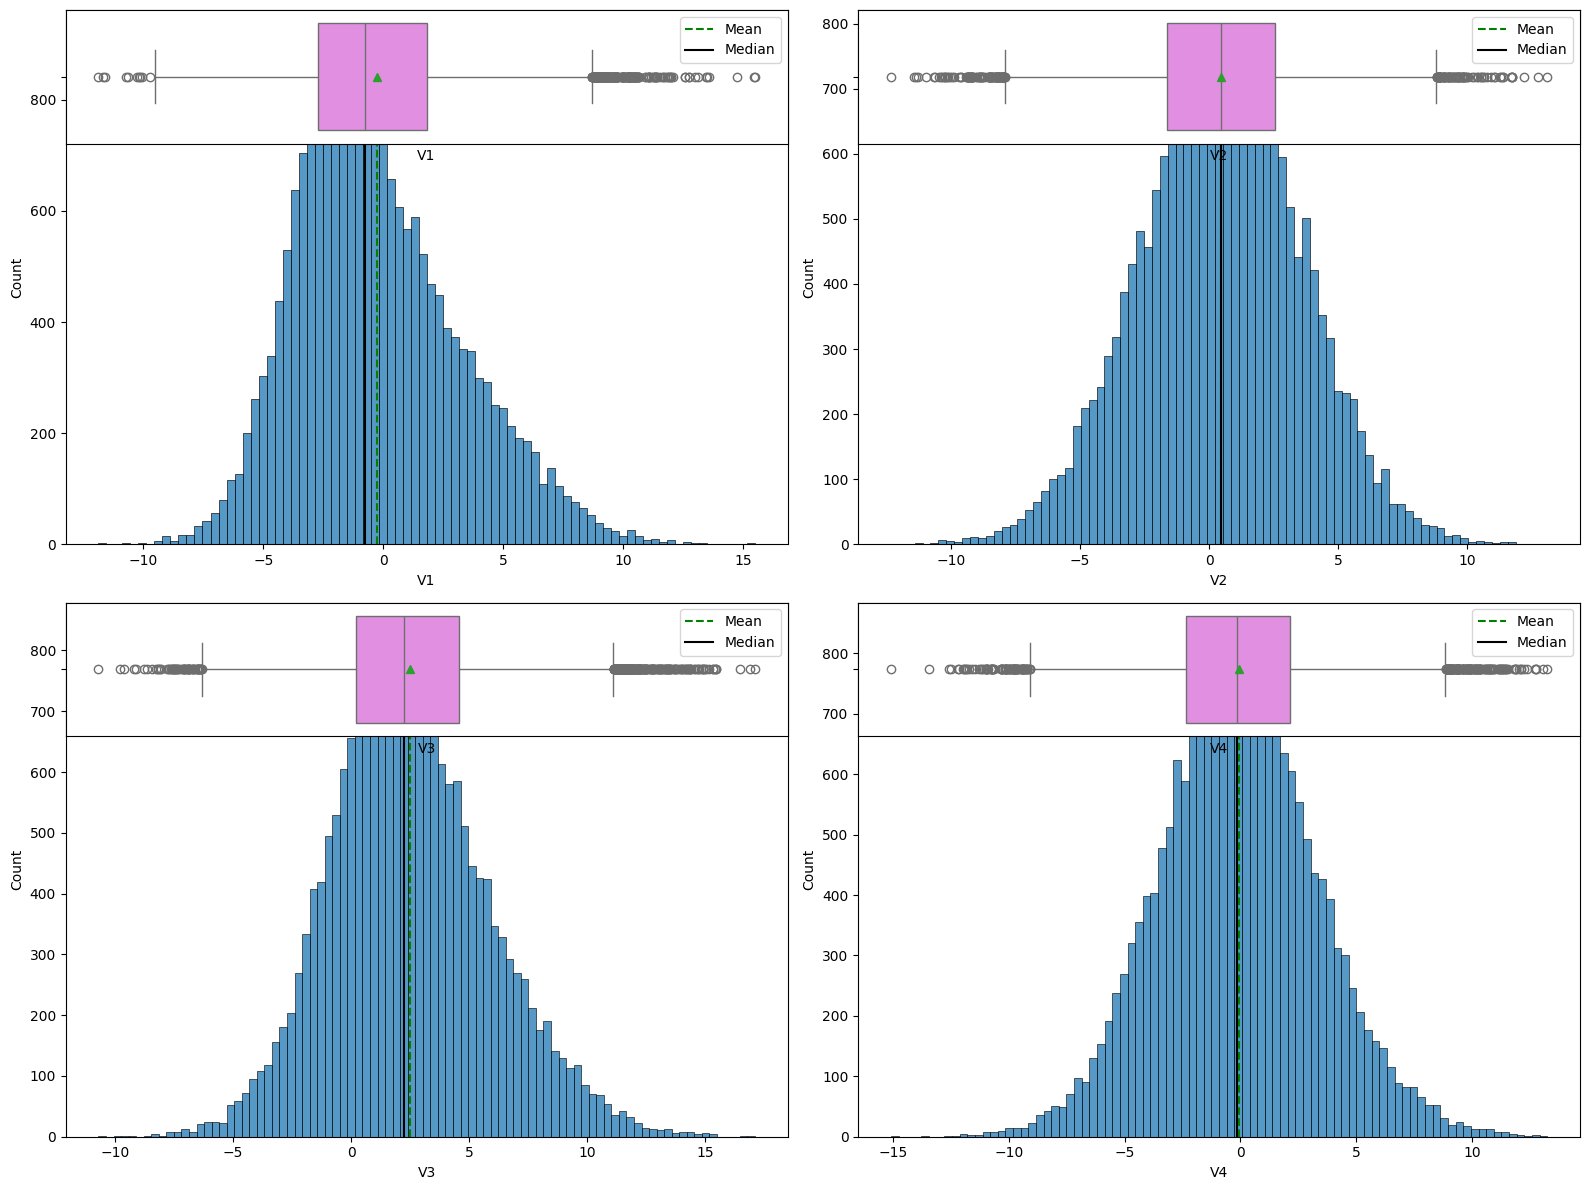

In [ ]:
features_to_plot = ['V1', 'V2', 'V3', 'V4']
histogram_boxplot_grid(df, features_to_plot);

V1 exhibits slightly right-skewed distributions with several outliers, while V2,V3 and V4 appear more symmetric.  
More or less all follows normal distribution.

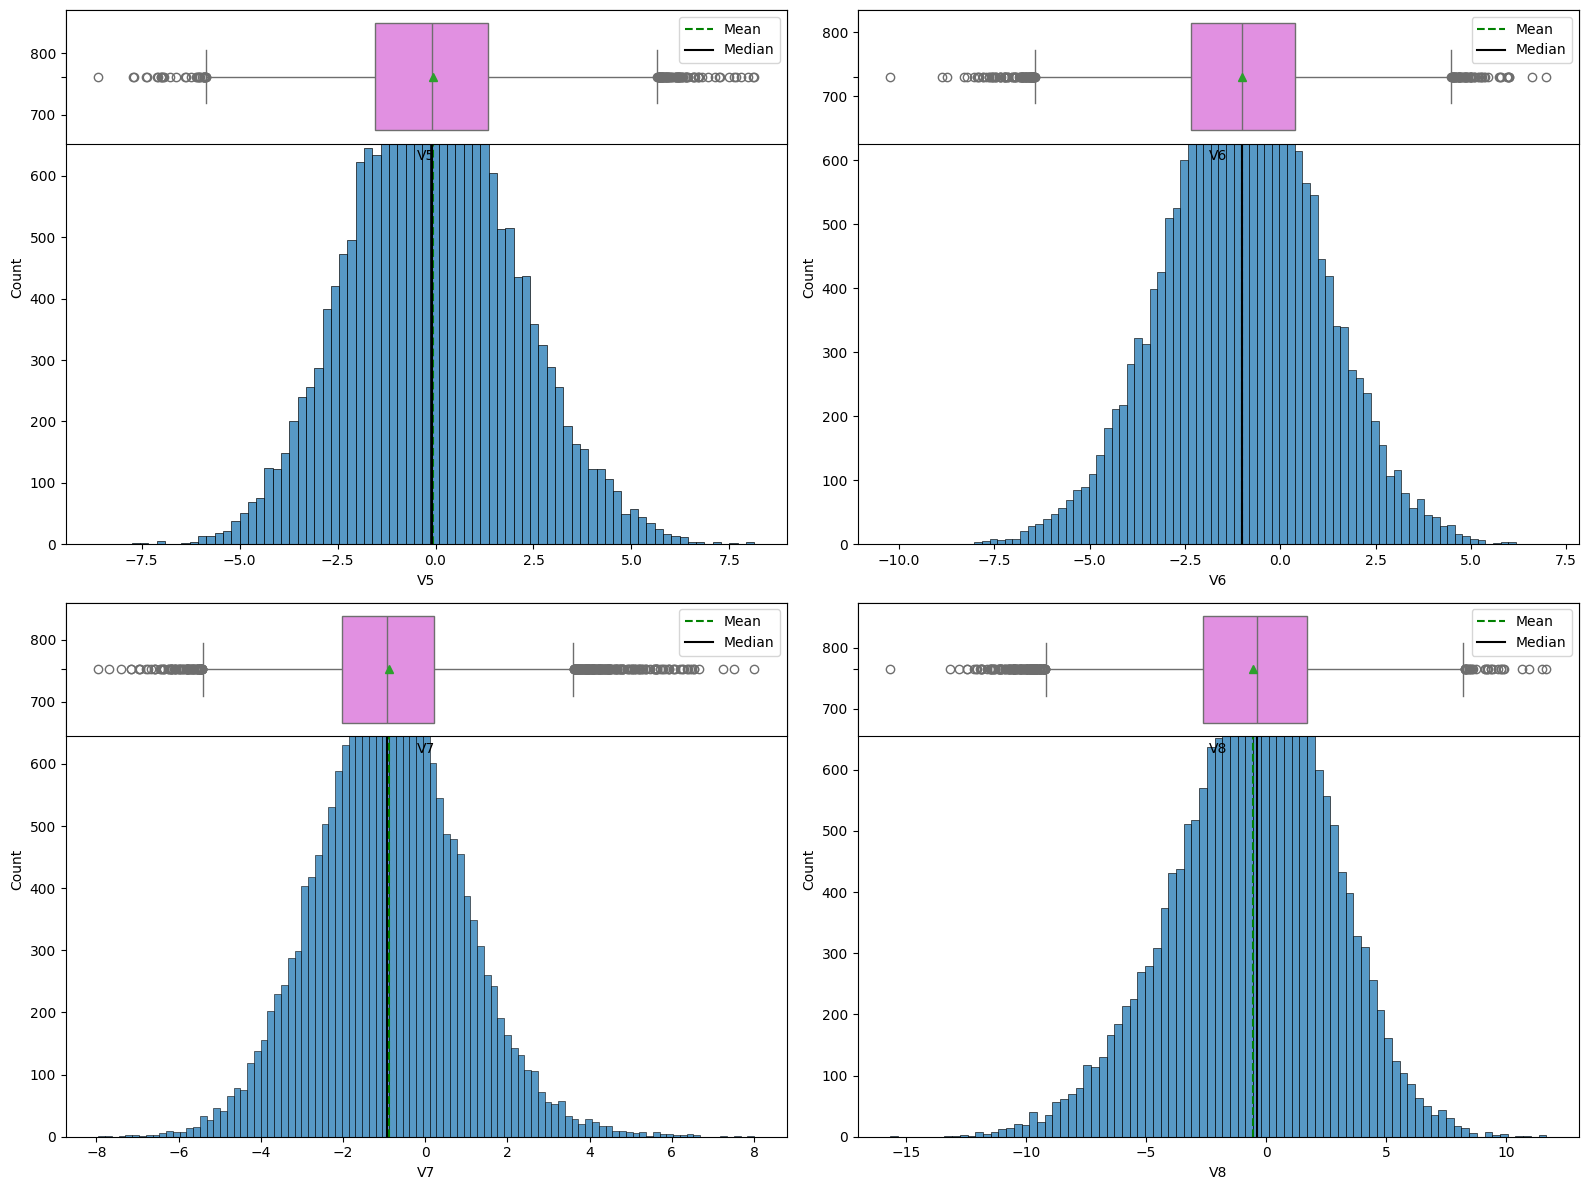

In [ ]:
features_to_plot = ['V5', 'V6', 'V7', 'V8']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

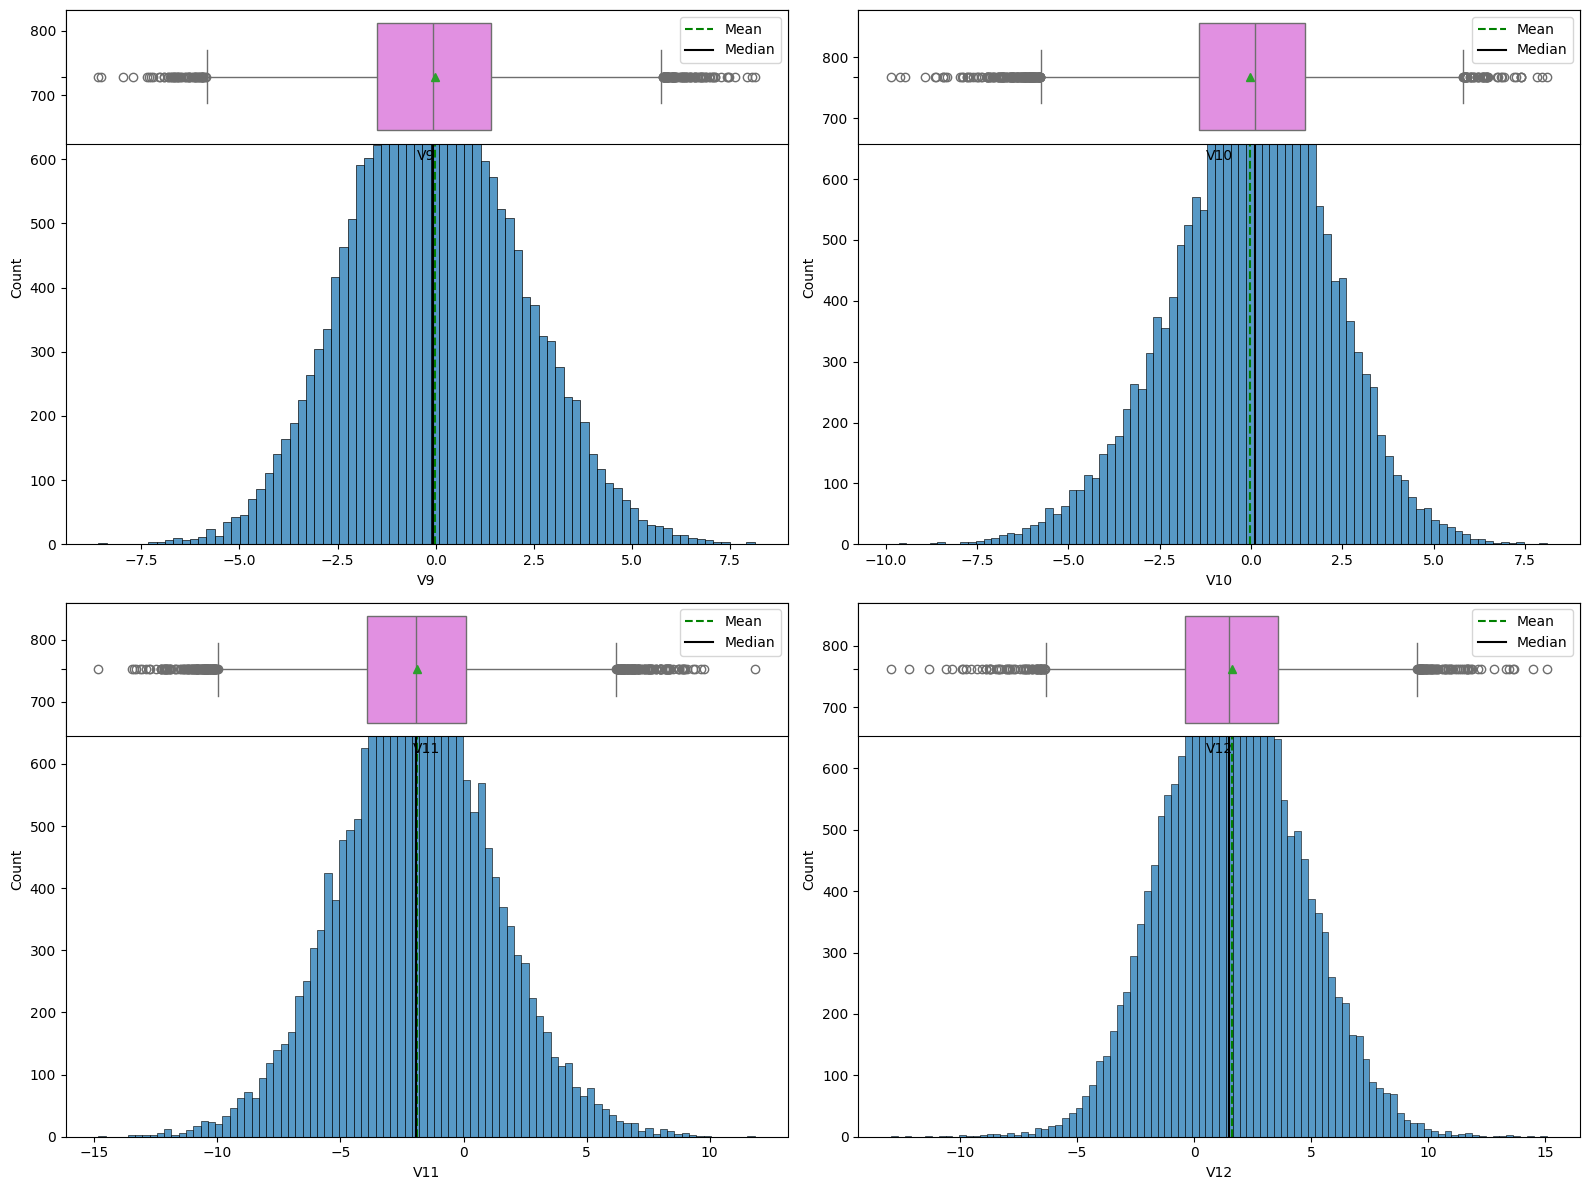

In [ ]:
features_to_plot = ['V9', 'V10', 'V11', 'V12']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

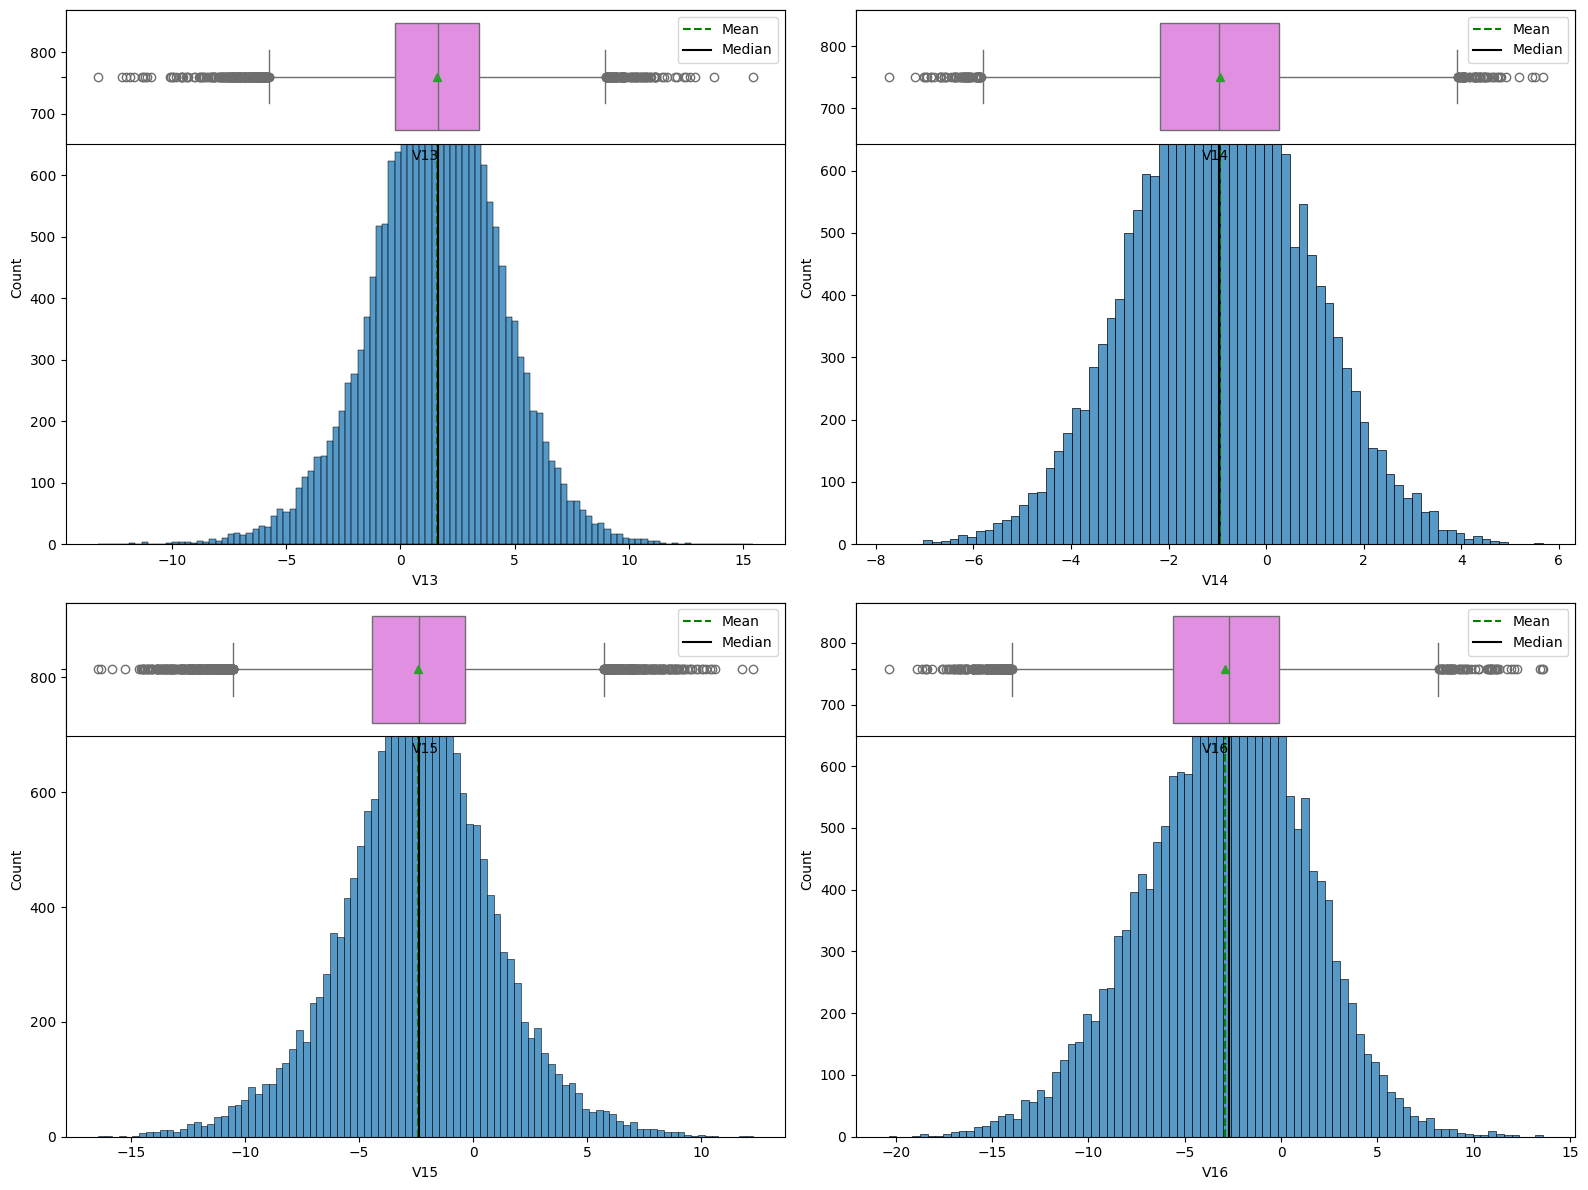

In [ ]:
features_to_plot = ['V13', 'V14', 'V15', 'V16']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

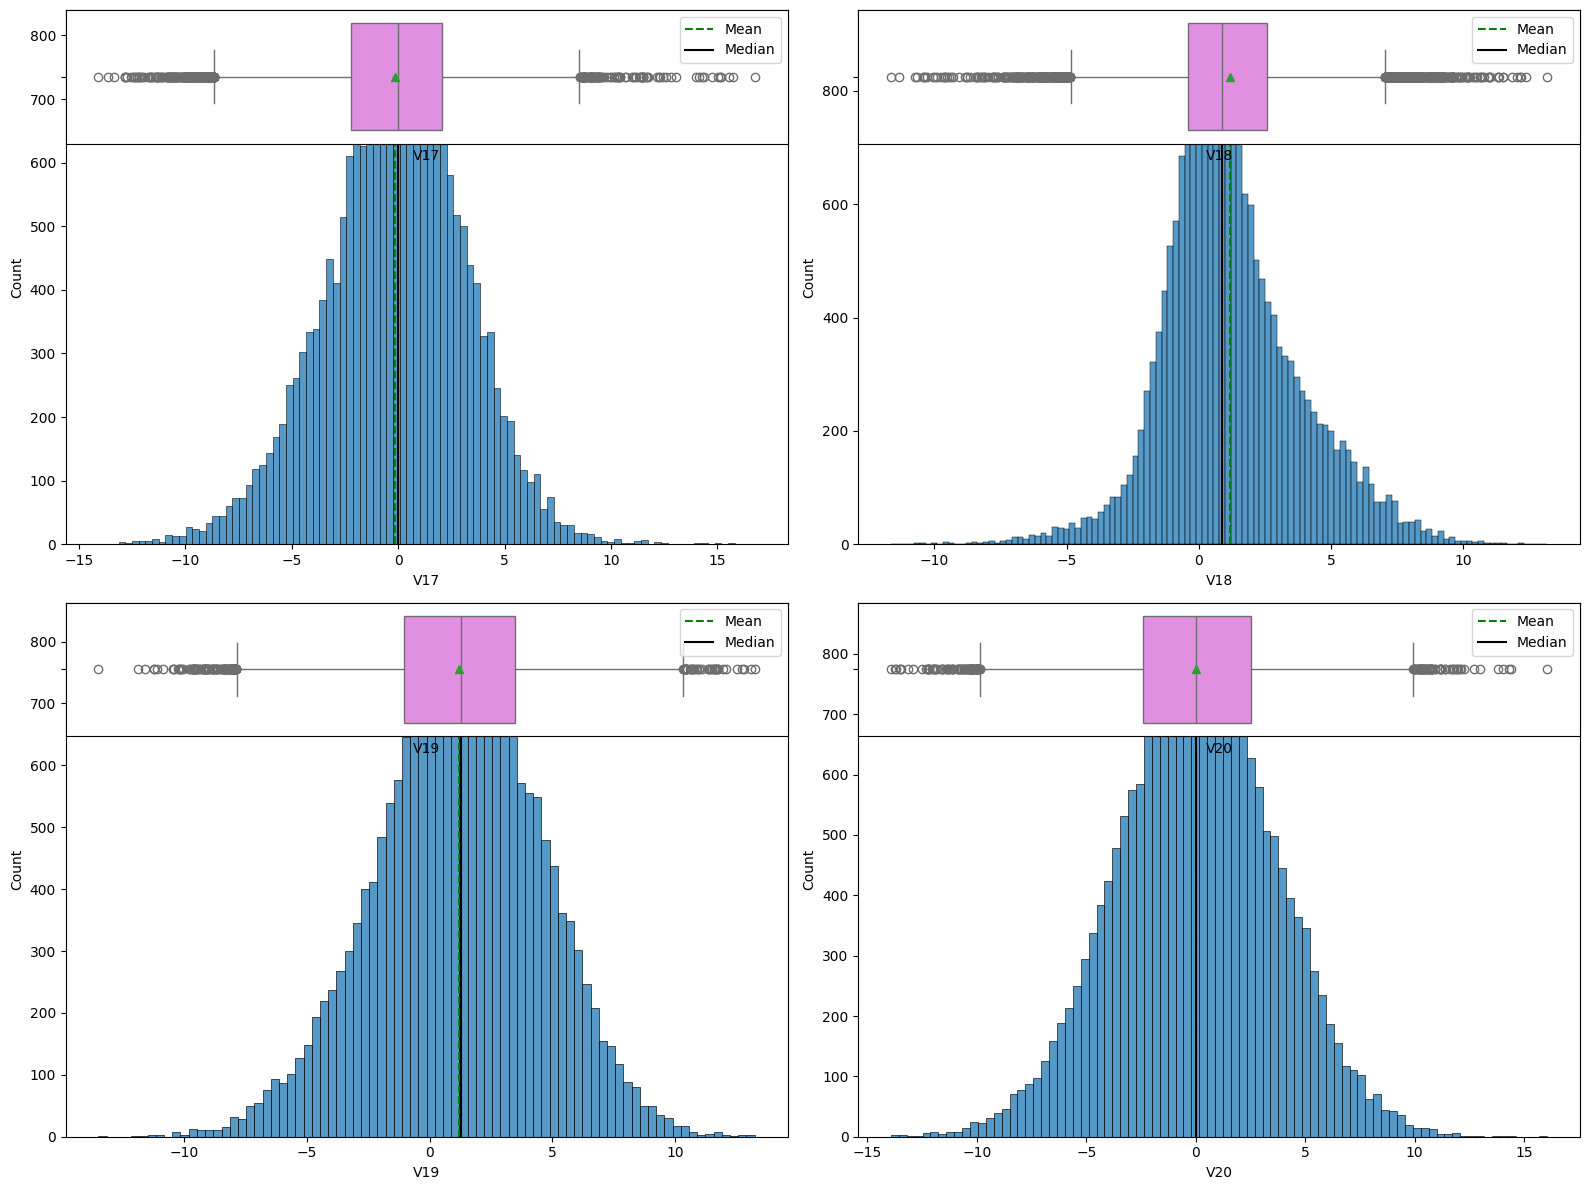

In [ ]:
features_to_plot = ['V17', 'V18', 'V19', 'V20']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

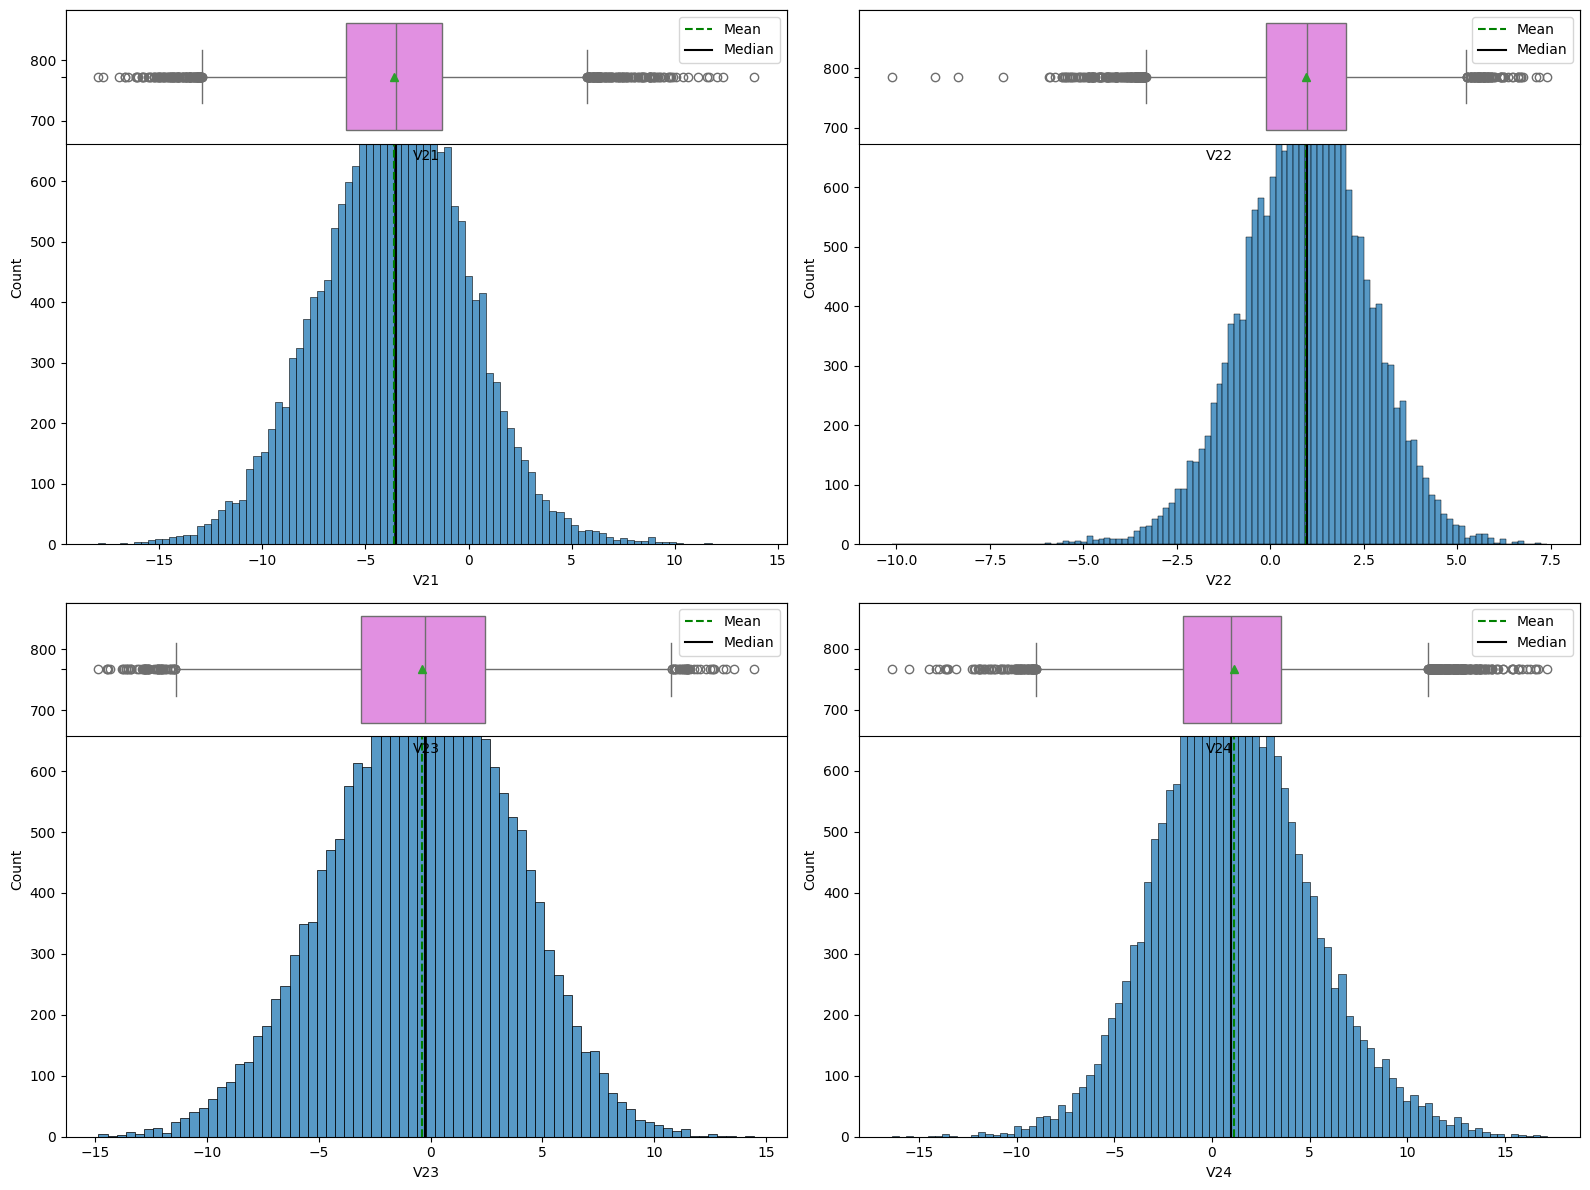

In [ ]:
features_to_plot = ['V21', 'V22', 'V23', 'V24']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

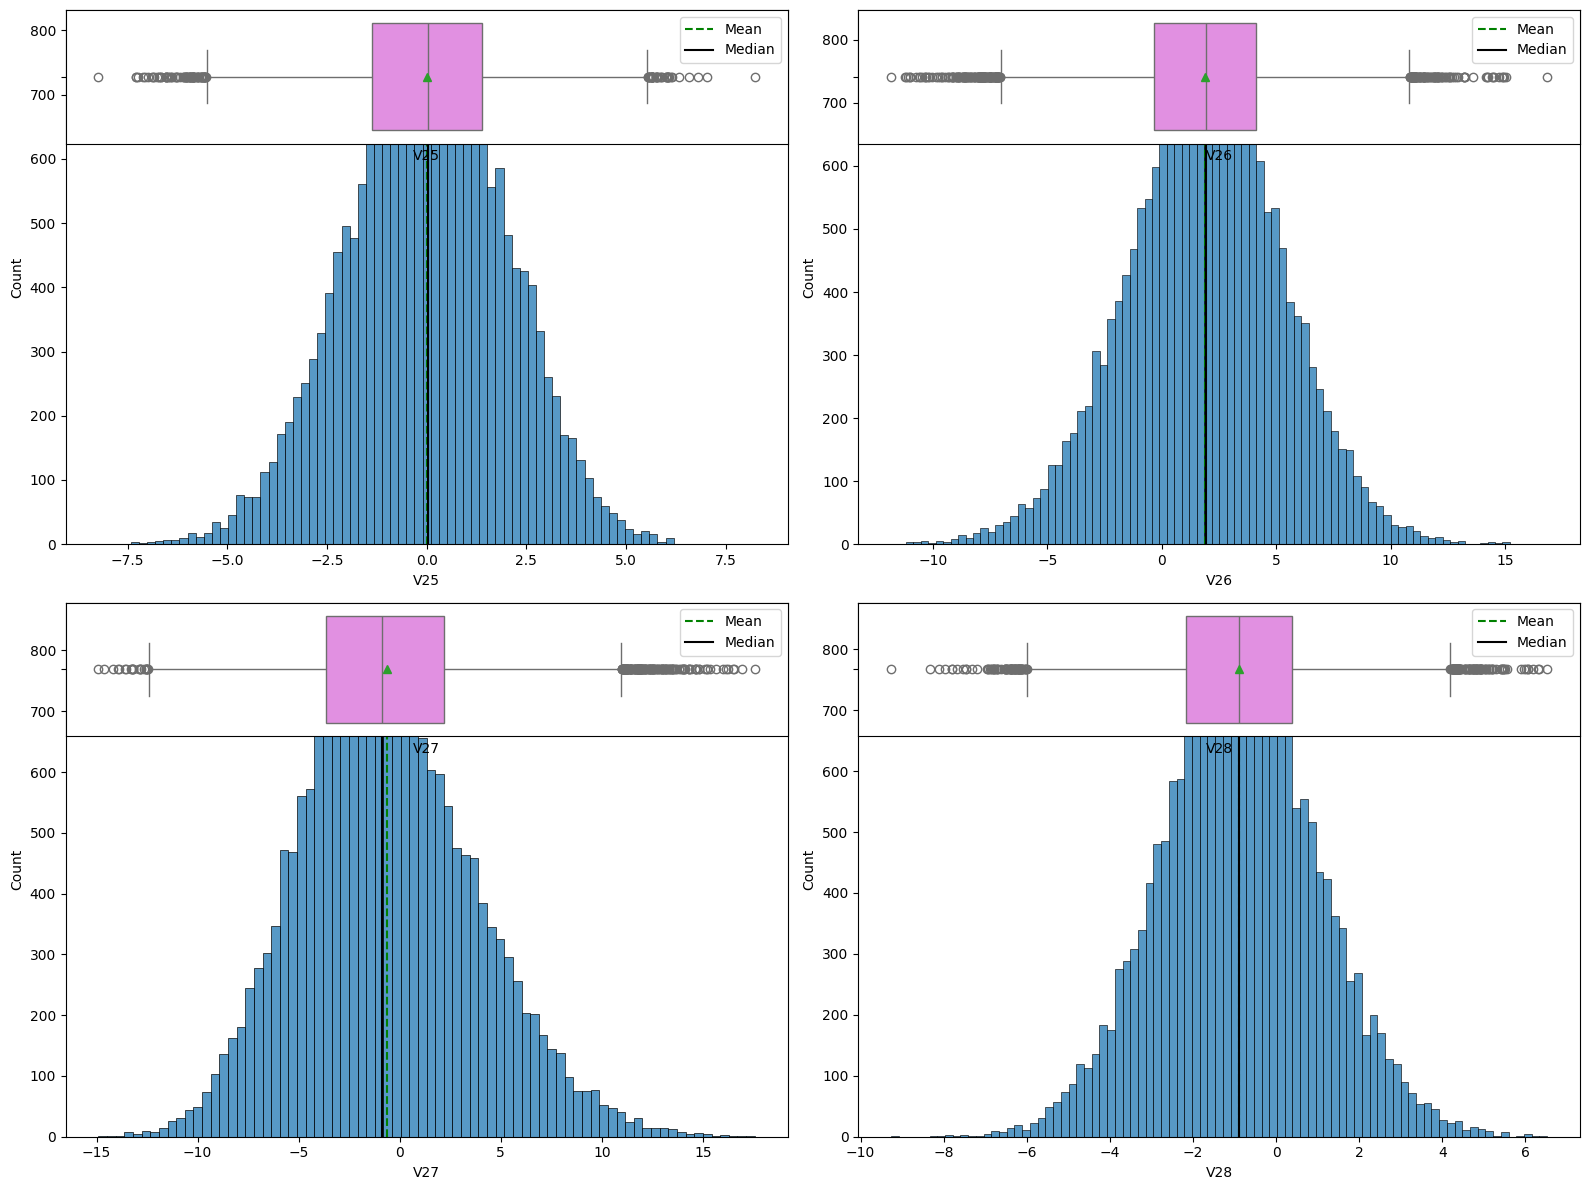

In [ ]:
features_to_plot = ['V25', 'V26', 'V27', 'V28']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

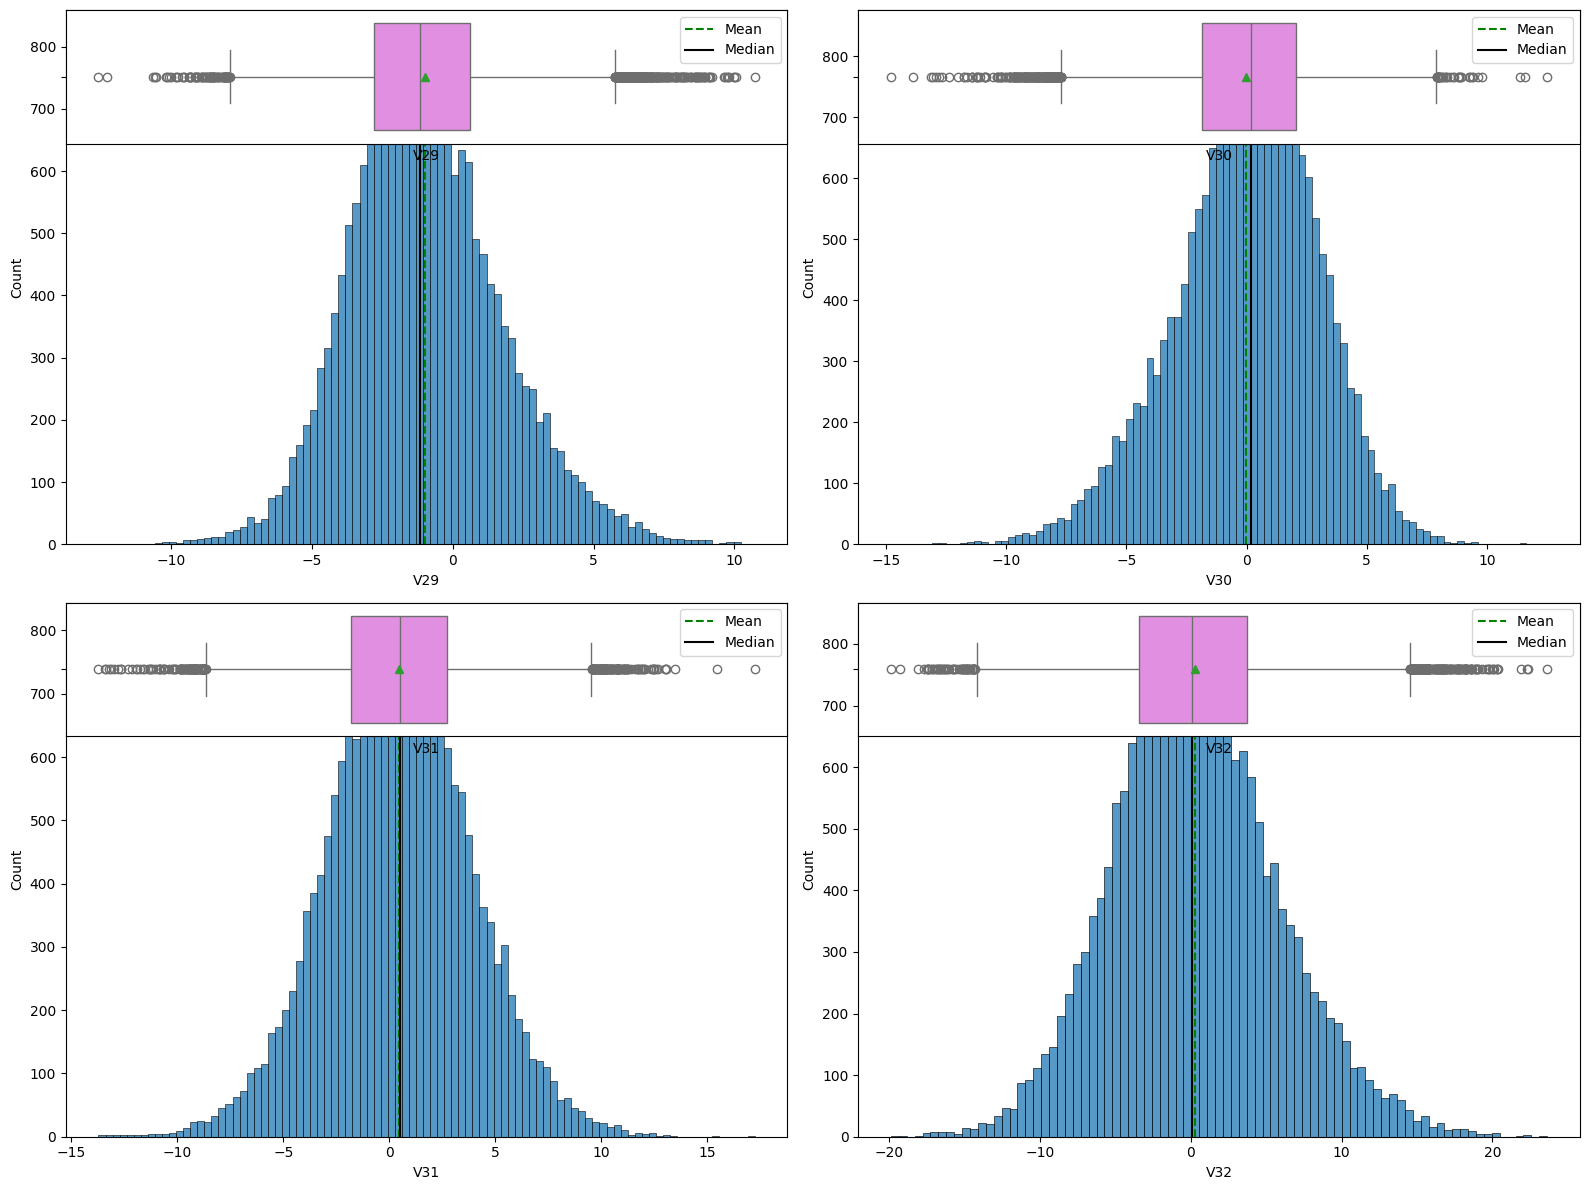

In [ ]:
features_to_plot = ['V29', 'V30', 'V31', 'V32']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

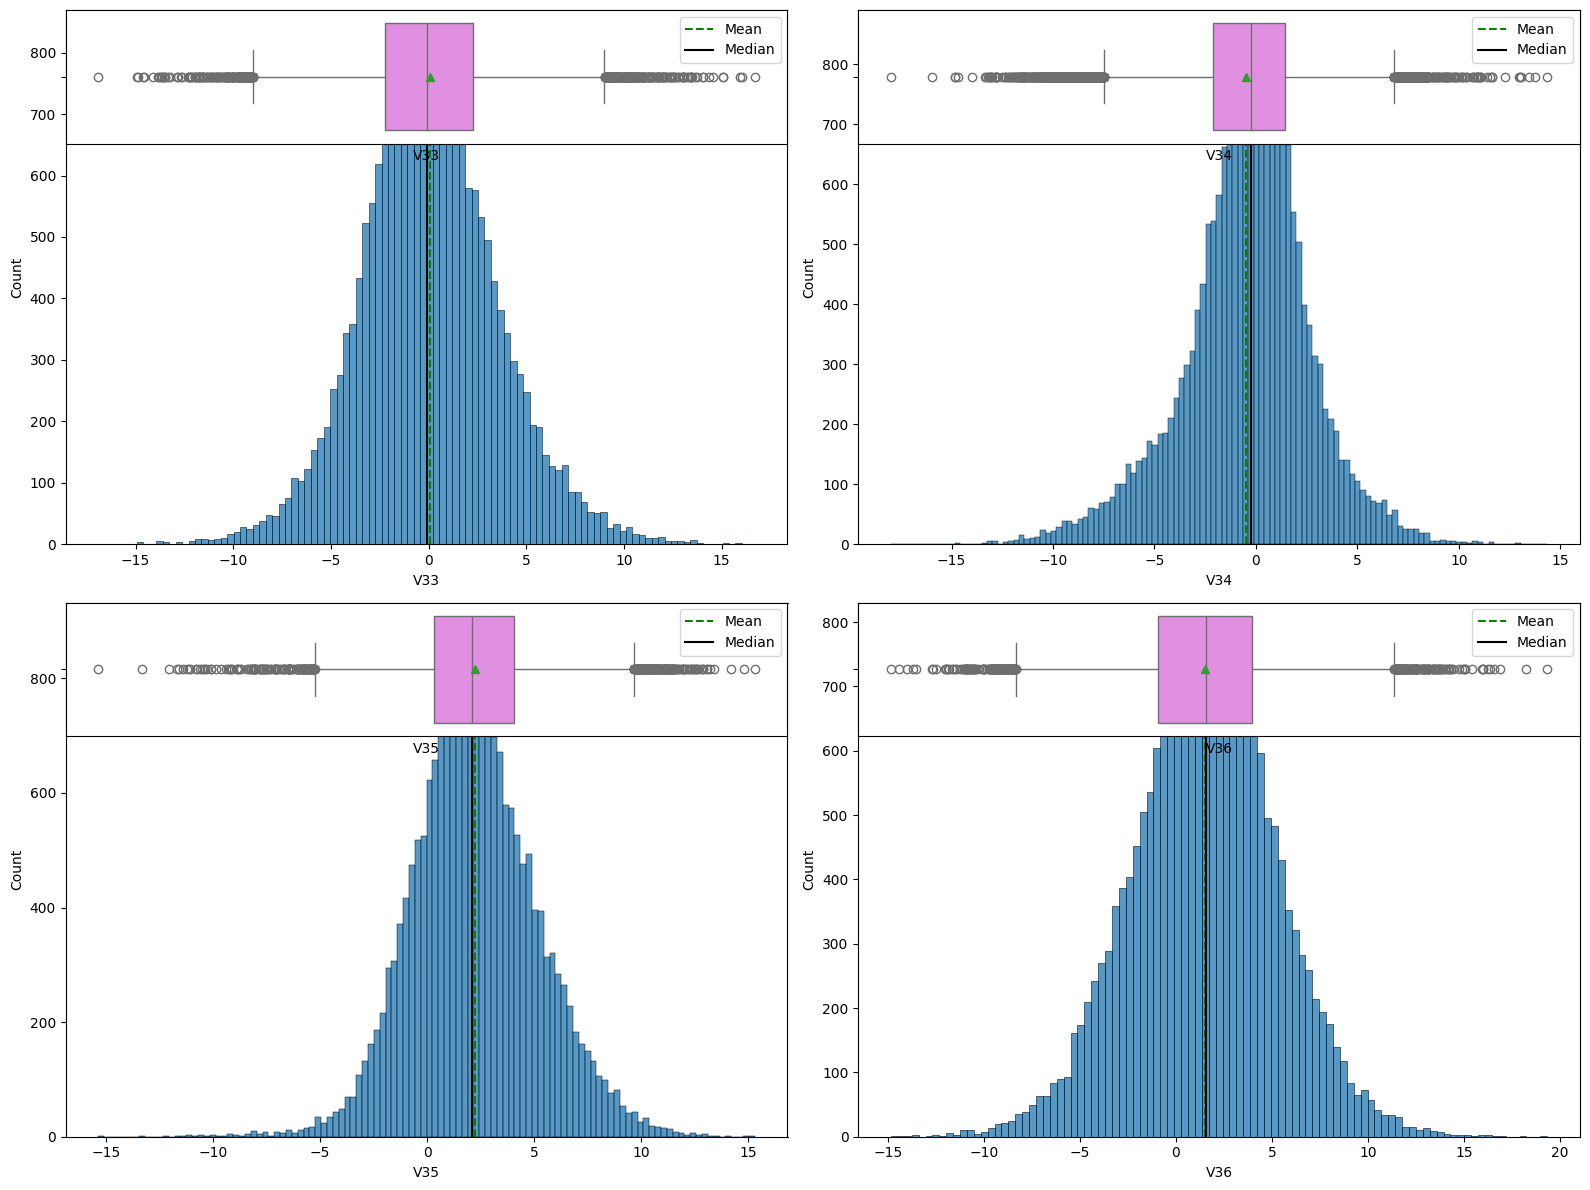

In [ ]:
features_to_plot = ['V33', 'V34', 'V35', 'V36']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

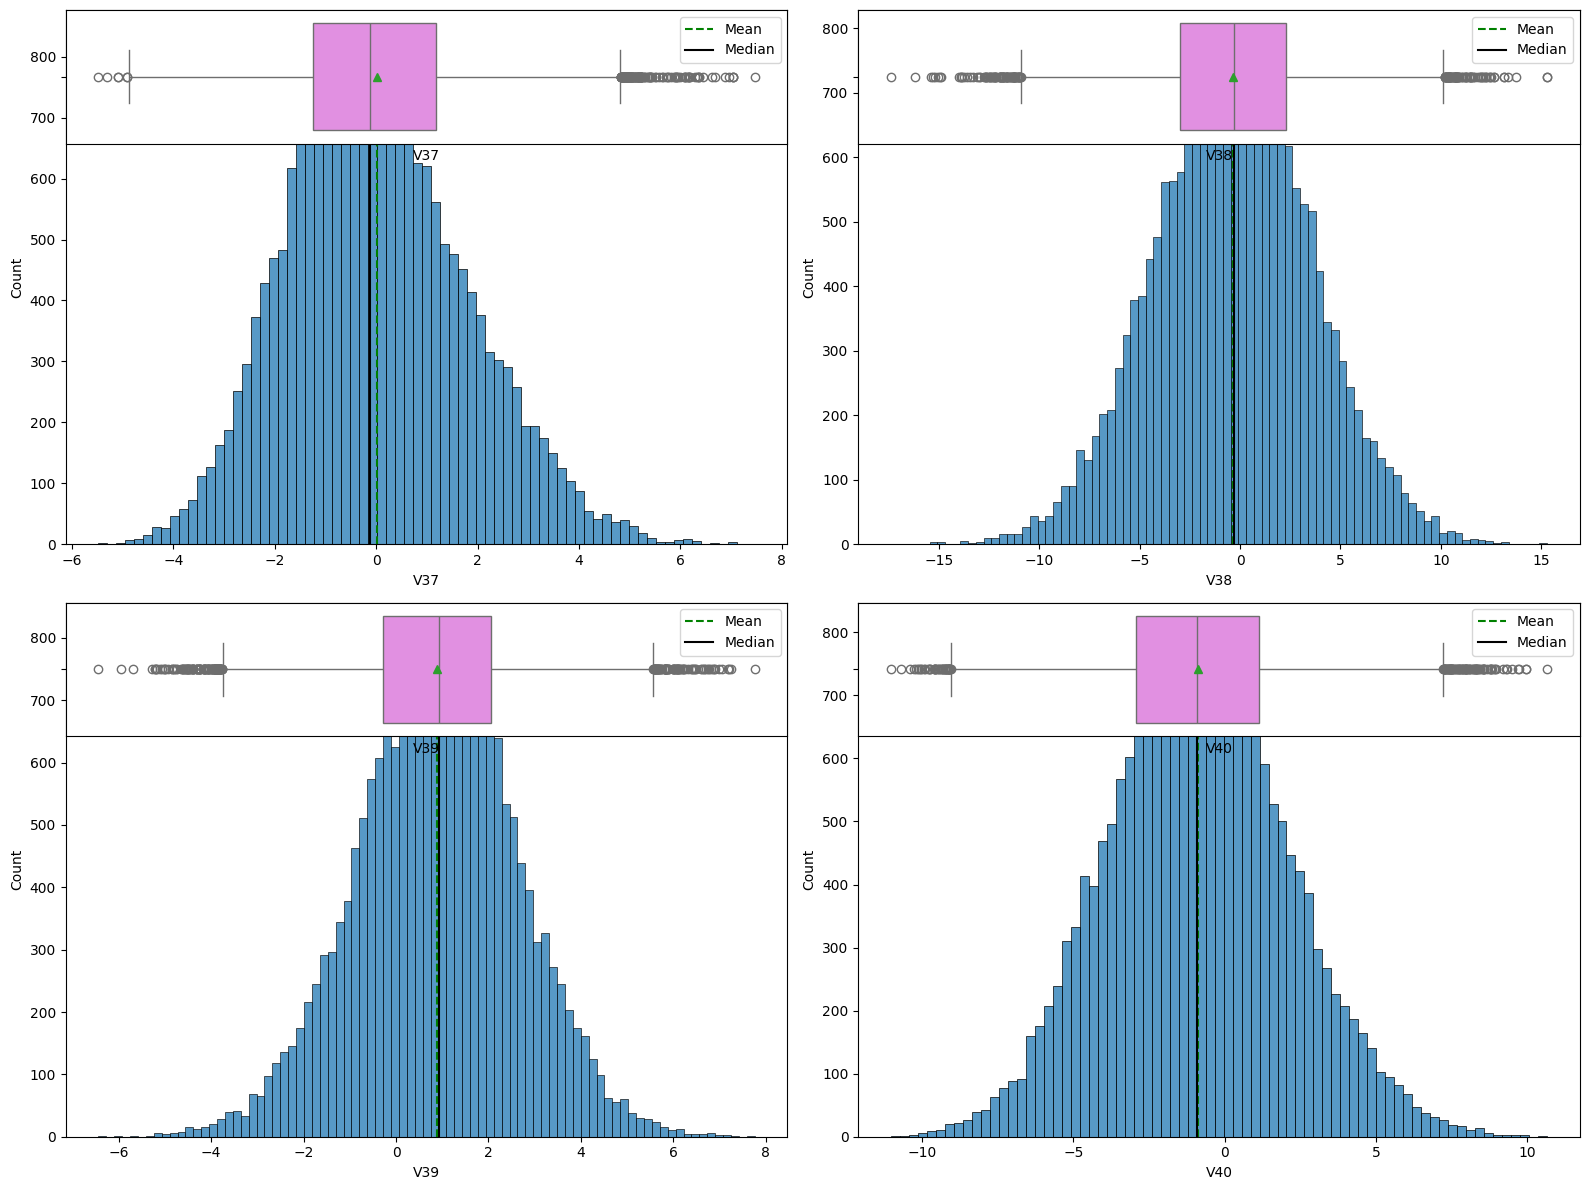

In [ ]:
features_to_plot = ['V37', 'V38', 'V39', 'V40']
histogram_boxplot_grid(df, features_to_plot);

More or less all the above 4 features follow normal distribution.

All the features follow normal distribution.

Whatever the outliers and slight skewness present will be taken care of with further Standardization(standard scaler).

### Understanding Target Variable

In [ ]:
df['Target'].value_counts(normalize=True)

,proportion
Target,
0,0.9445
1,0.0555


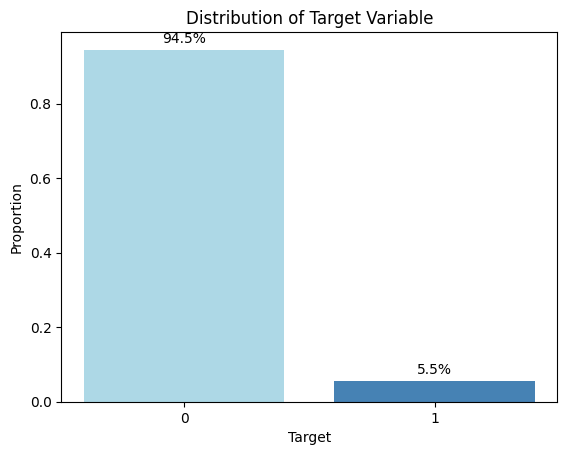

In [ ]:
# Calculate normalized value counts
value_counts = df['Target'].value_counts(normalize=True)

# Plotting
fig, ax = plt.subplots()
bars = ax.bar(value_counts.index.astype(str), value_counts.values, color=['lightblue', 'steelblue'])

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height*100:.1f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Set labels
ax.set_xlabel('Target')
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Target Variable')
plt.show()


Target is highly imbalanced, may need class weights for better model prediction.

## Bivariate Analysis

### Point-biserial correlation (continuous vs binary target)

In [ ]:
from scipy.stats import pointbiserialr

for feature in features:
    corr, _ = pointbiserialr(df[feature], df['Target'])
    print(f'{feature}: Point-biserial correlation with Target = {corr:.3f}')


V1: Point-biserial correlation with Target = 0.073
V2: Point-biserial correlation with Target = -0.001
V3: Point-biserial correlation with Target = -0.214
V4: Point-biserial correlation with Target = 0.111
V5: Point-biserial correlation with Target = -0.101
V6: Point-biserial correlation with Target = 0.000
V7: Point-biserial correlation with Target = 0.237
V8: Point-biserial correlation with Target = 0.136
V9: Point-biserial correlation with Target = 0.008
V10: Point-biserial correlation with Target = -0.051
V11: Point-biserial correlation with Target = 0.197
V12: Point-biserial correlation with Target = -0.022
V13: Point-biserial correlation with Target = -0.140
V14: Point-biserial correlation with Target = 0.118
V15: Point-biserial correlation with Target = 0.249
V16: Point-biserial correlation with Target = 0.231
V17: Point-biserial correlation with Target = 0.085
V18: Point-biserial correlation with Target = -0.293
V19: Point-biserial correlation with Target = 0.054
V20: Point-bis

**Point-Biserial Correlation Insights**

- **Top Positively Correlated Features with Target (Failure)**
  - V15: 0.249
  - V21: 0.256
  - V7: 0.237
  - V16: 0.231
  - V11: 0.197
  - V28: 0.207
  - These features are **strong candidates for predictive modeling**, as they show meaningful association with failure events.

- **Strong Negative Correlations**
  - V18: -0.293
  - V36: -0.216
  - V3: -0.214
  - V39: -0.227
  - These features may **inversely signal failure**, offering contrast that can improve model discrimination.

- **Weak or No Correlation**
  - Features like **V2, V6, V25, V37, V38, V40** have near-zero correlation → likely **uninformative** for classification.

### Boxplots for Features vs Target
Let's choose top 8 features for boxplot comparisons

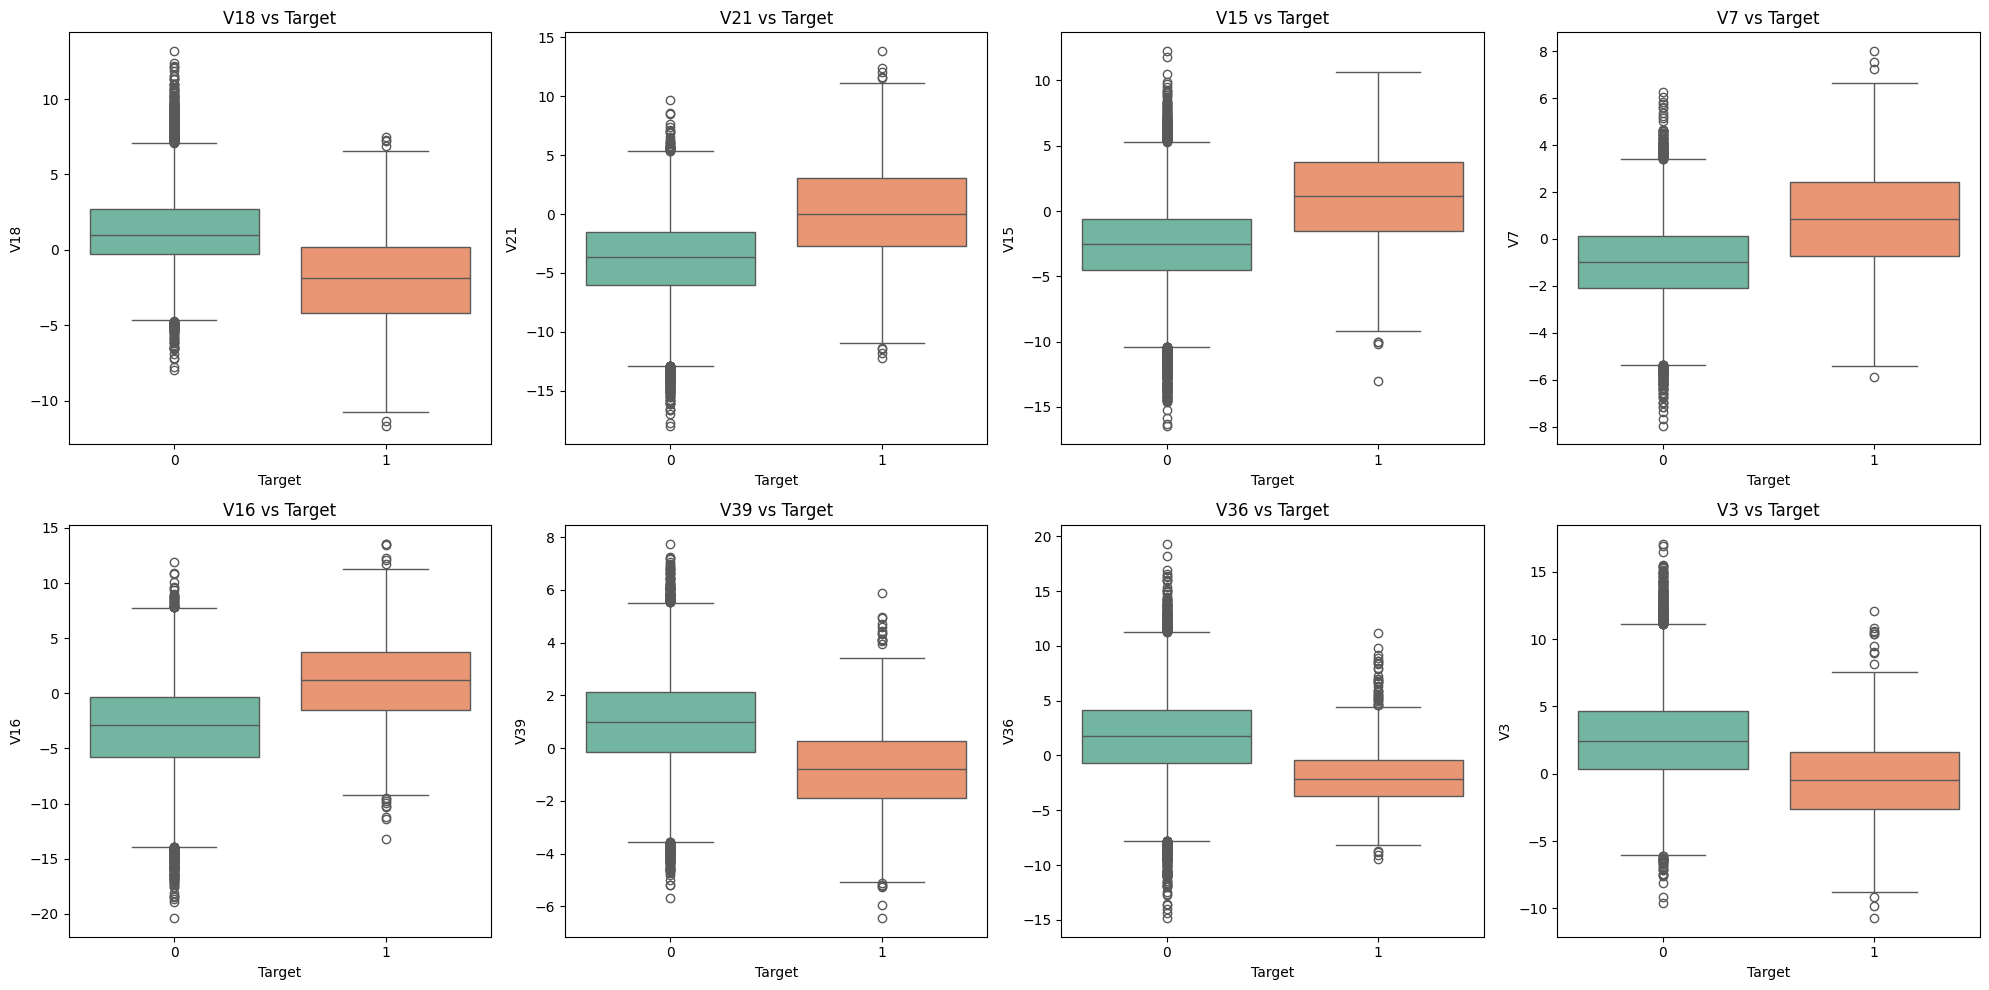

In [ ]:
# Get feature list excluding target
features = df.drop(columns=['Target']).columns.to_list()

# Compute point-biserial correlations
correlations = {}
for feature in features:
    corr, _ = pointbiserialr(df[feature], df['Target'])
    correlations[feature] = abs(corr)

# Select top 8 features
top_features = sorted(correlations, key=correlations.get, reverse=True)[:8]

# Create 2x4 grid of boxplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for ax, feature in zip(axes.flatten(), top_features):
    sns.boxplot(x='Target', y=feature, data=df, palette='Set2', ax=ax)
    ax.set_title(f'{feature} vs Target')

plt.tight_layout()
plt.show()


**Boxplot w.r.t Target Insights**

**1. V18 vs Target**
- Target = 0: V18 values are more centered around the median, with a tighter interquartile range.
- Target = 1: V18 shows a noticeable shift in distribution likely lower median and wider spread.
- This aligns with the strong negative point-biserial correlation (-0.293), suggesting that lower V18 values are associated with failure.

**2. V21 vs Target**
- Target = 0: V21 values tend to be negative, with a median around –5 and a spread from about –10 to 0.
- Target = 1: V21 shifts upward, with a median near 0 and values ranging from –5 to +5.
- This distribution shift supports the strong positive correlation (0.256) between V21 and failure. Higher V21 values are more associated with Target = 1.

**3. V15 vs Target**
- Target = 0: V15 values are centered around –1, with a wider spread and more extreme outliers.
- Target = 1: V15 shifts upward, with a median near +2 and a tighter distribution.
- This supports the strong positive correlation (0.249). Higher V15 values are associated with failure.

**4. V7 vs Target**
- Target = 0: Median ≈ –1, IQR: –2 to +1, Numerous outliers (above +4, below –6).
- Target = 1: Median ≈ 0, IQR: –1 to +2, Fewer outliers, but still some extreme values.
- The positive correlation (0.237) between V7 and Target is reflected in the upward shift in median and IQR.

**5. V16 vs Target**
- Target = 0: Median ≈ –5, IQR: –10 to 0, Outliers: above +10 and below –15.
- Target = 1: Median ≈ 0, IQR: –5 to +5, Outliers: above +10 and below –10.
- The upward shift in median and IQR for Target = 1 supports the positive correlation (0.231) between V16 and failure.

**6. V39 vs Target**
- Target = 0: Median V39 is slightly positive, IQR spans roughly –2 to +3, Outliers extend up to +8.
- Target = 1: Median shifts downward, closer to –1, IQR spans –4 to +1, More values concentrated in the negative range.
- This aligns with the strong negative correlation (–0.227) between V39 and failure.

**7. V36 vs Target**
- Target = 0: Median V36 is positive, around +1, IQR spans roughly 0 to +3, Outliers extend both above and below, but mostly on the higher end.
- Target = 1: Median shifts downward, closer to –1, IQR spans –3 to 0, More concentrated in the negative range.
- This matches the strong negative correlation (–0.216) between V36 and failure.

**8. V3 vs Target**
- Target = 0: Median ≈ 0, IQR: –2 to +5, Outliers: both above +10 and below –10.
- Target = 1: Median also ≈ 0, IQR: –1 to +4, Similar outlier pattern.
- Despite the strong negative correlation (–0.214), the boxplot shows minimal shift in central tendency.

## Multivariate Analysis

### Correlation Heatmap(Feature Interactions)
Let's focus only on the top 10 features most correlated with failure.

This makes the heatmap visually cleaner and more interpretable.

Helps spot multicollinearity or feature interactions that may affect model performance.

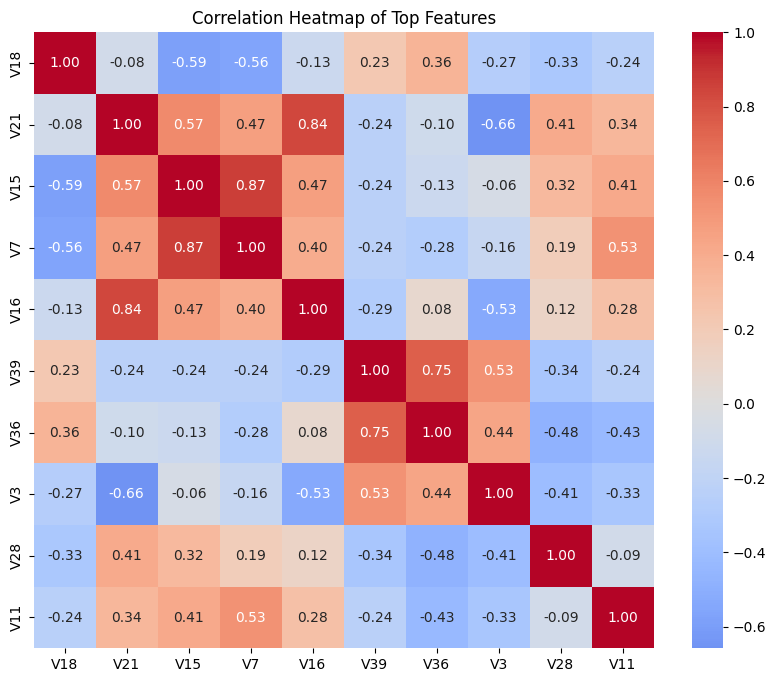

In [ ]:
# Compute correlations with the target
target_corr = df.corr()['Target'].drop('Target').abs()

# Select top 10 features most correlated with the target
top_features = target_corr.sort_values(ascending=False).head(10).index

# Create a filtered correlation matrix
filtered_corr_matrix = df[top_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Top Features')
plt.show()



**Key Observations from the Heatmap**

- **Strong Positive Correlations:**
  - **V15 & V7:** 0.87  likely capturing similar patterns, possibly redundant.
  - **V21 & V16:** 0.84: strong relationship, may indicate shared signal or feature overlap.
  - V36 & V39: 0.75: both may represent related operational metrics.

- **Strong Negative Correlations:**
  - **V21 & V3:** -0.66: inverse relationship, useful for contrast in modeling.
  - **V18 & V15/V7:** ~-0.59: V18 behaves differently from V15 and V7, adding diversity to feature space.

- **Moderate Correlations:**
  - **V11** shows moderate positive correlation with **V7** (0.53) and **V15** (0.41), suggesting it's a supportive feature.
  - **V28** has mild positive ties to **V15/V21** and mild negative ties to **V36/V3**, indicating a bridging role.

### Pairplot of top correlated features with Target

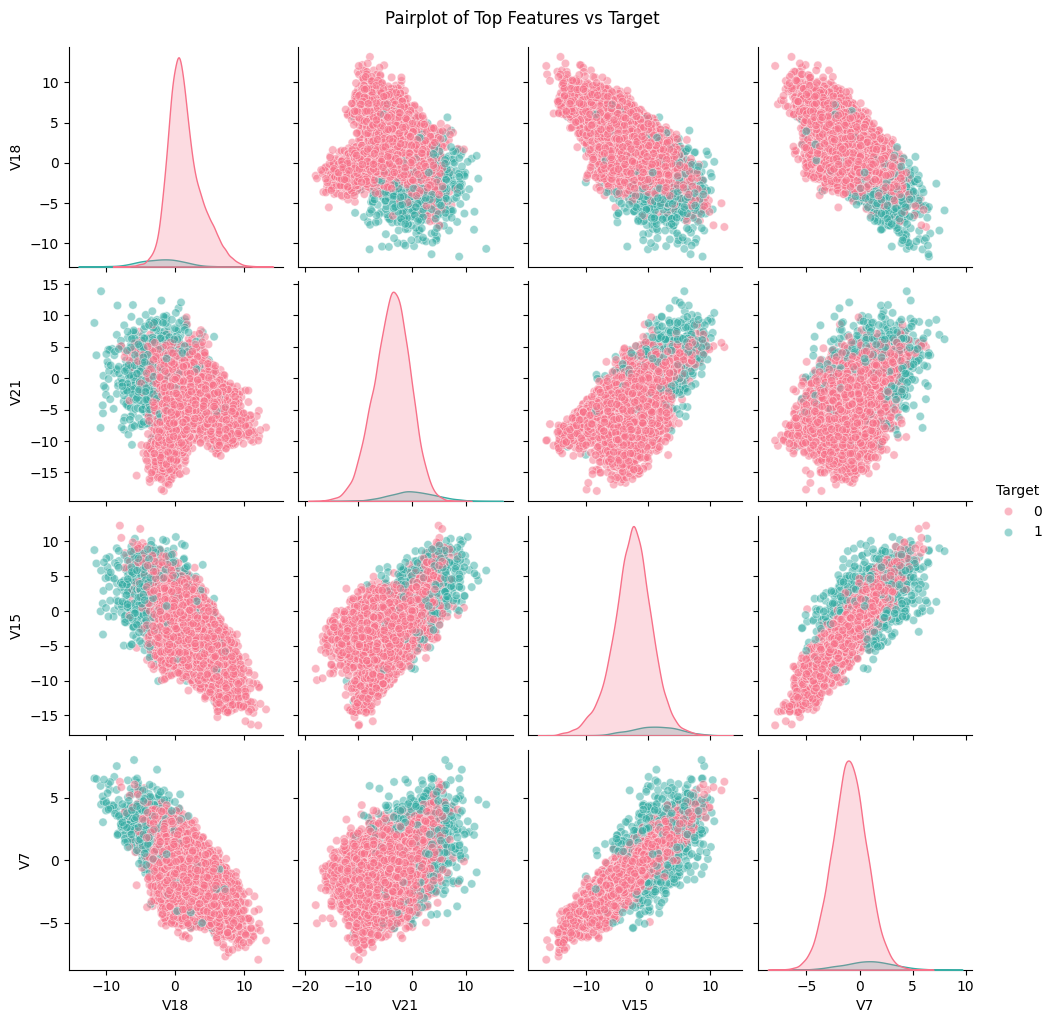

In [ ]:
# Identify top 4 features most correlated with Target
correlations = df.corr()['Target'].drop('Target').abs().sort_values(ascending=False)
top_features = correlations.head(4).index.tolist()

sns.pairplot(df, vars=top_features, hue='Target', palette='husl', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Top Features vs Target', y=1.02)
plt.show()


**Pairplot Insights**

1. V18 and V21:
- Show strong separation between failure and non-failure classes.
- Clear clustering of teal (failures) and pink (non-failures) points suggests high predictive value.

2. V15 and V7:
- Moderate separation, with some overlap.
- Still useful when combined with other features in multivariate models.

3. Diagonal plots (feature distributions):
- V18 and V21 have distinct density curves for each class.
- Indicates that failures tend to occur within specific value ranges.

4. Off-diagonal plots (feature interactions):
- V18 vs V21 and V15 vs V18 show visually separable clusters, hinting at non-linear relationships.

**Takeaways**

1. V18, V21, followed by V15 and V18 are top candidates for feature importance.
2. Feature combinations reveal latent structure in the data that supports classification.

This visualization validates our choice of using deep learning models and class weighting, as the failure class is visually separable but imbalanced.

# Data Preparation for Modelling

From the histogram distributions it is clear the data is normally distributed. Therefore no further log transformations required.

In [ ]:
X = df.drop(columns=['Target'])
y = df['Target']

## Splitting the train data

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_valid.shape)

print("Percentage of classes of Target Variable in training set:")
print(y_train.value_counts(normalize=True))

print("Percentage of classes of Target Variable in validation set:")
print(y_valid.value_counts(normalize=True))

Shape of Training set :  (16000, 40)
Shape of Validation set :  (4000, 40)
Percentage of classes of Target Variable in training set:
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
Percentage of classes of Target Variable in validation set:
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64


## Standardization of data
Applying StandardScaler to continuous features ensures continuous features are standardized, improving model performance.

In [ ]:
# Applying StandardScaler ONLY to continuous features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

## Converting targets (y_train, y_valid) to NumPy arrays or tensors for NNs in Tensorflow/Keras
 Why Convert in Neural Networks?
- NNs often require explicit shapes and consistent data types.
- NumPy arrays make it easier to:
- Reshape targets
- Apply one-hot encoding
- Use GPU acceleration



In [ ]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()

### Utility functions

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

# Model Evaluation Criteria
**Cost-Sensitive Evaluation Strategy**

Primary Goal: Minimize False Negatives
- Missing a failure leads to replacement, which is very expensive.
- So, our model should catch as many failures as possible, even if it means a few extra inspections.

Recommended Metrics:
- **Recall** (Sensitivity)
- Measures how many actual failures were correctly identified.
- Formula: Recall = TP / (TP + FN)
- High recall = fewer missed failures = fewer replacements.
- **Moderate precision and balanced F1 score** as we not want every output as failure leading to impending inspection costs too.


## Class Weights
As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: np.float64(1.0587612493382743), 1: np.float64(18.01801801801802)}

Class weights will be used to address severe imbalance (failure class weighted ~18x)

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

## Model 0
Let's start with a neural network consisting of
- two hidden layers with 14 and 7 neurons respectively
- activation function of ReLU.
- SGD as the optimizer

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD()    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2492 - val_loss: 0.5198
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7347 - val_loss: 0.3334
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5882 - val_loss: 0.2628
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5269 - val_loss: 0.2323
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4915 - val_loss: 0.2154
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4676 - val_loss: 0.2021
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4511 - val_loss: 0.1929
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4374 - val_loss: 0.1823
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4258 - val_loss: 0.1773
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4163 - val_loss: 0.1767
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4097 - val_loss: 0.1728
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  23.771679878234863


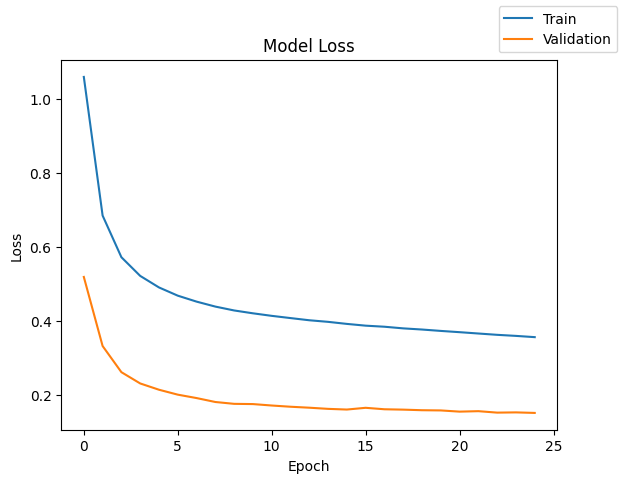

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.967125,0.967125,0.975086,0.969721


In [ ]:
# validation performance
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9655,0.9655,0.97461,0.96844


- Overall accuracy is high ~96.5%.   
- High Recall: Model catches ~96.5% of actual failures minimizing costly replacements.   
- Great Precision(97.5%): Most predicted failures are real meaning low inspection waste.  
- F1 score is very strong meaning balanced precision recall tradeoff.  
- Low Overfitting: Train and validation metrics are closely aligned.  
- Stable Learning: Loss curves converge smoothly, indicating good training dynamics.

- Cost-Sensitive Success: The model prioritizes recall without sacrificing precision, aligning well with ReneWind’s cost hierarchy (Replacement > Repair > Inspection).



## Model 1
After the 9th epoch, the model's rate of learning was low.  
Let's try adding momentum to check whether it's accelerating the learning process.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8591 - val_loss: 0.2694
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4668 - val_loss: 0.2386
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4341 - val_loss: 0.2211
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4130 - val_loss: 0.2527
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4051 - val_loss: 0.1925
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3676 - val_loss: 0.2742
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3662 - val_loss: 0.2731
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3605 - val_loss: 0.2553
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3562 - val_loss: 0.2477
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3479 - val_loss: 0.2215
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3480 - val_loss: 0.2265
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  30.01831889152527


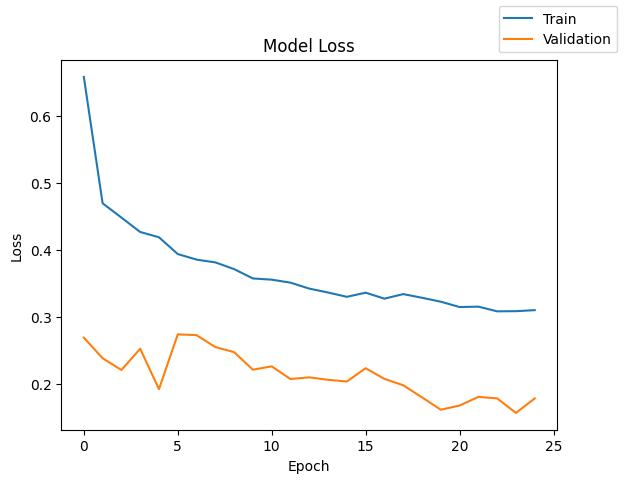

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.958187,0.958187,0.972588,0.962737


In [ ]:
# validation performance
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.95375,0.95375,0.970333,0.959095


Model is okay but performance reduced across all metrics.  
There are many oscillations in validation loss with across epochs.

- Slightly lower recall than Model 0, may lead to more missed failures (higher replacement cost).

- Precision remains high, which helps control inspection costs.

- Loss curve shows stable convergence, though validation loss fluctuates mildly—still within acceptable range.

- Generalization is good, but performance is marginally behind Model 0 in all metrics.

## Model 2
Let's change the optimizer to Adam.  
This will introduce momentum as well as an adaptive learning rate.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9887 - val_loss: 0.3496
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5968 - val_loss: 0.2670
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5226 - val_loss: 0.2270
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4830 - val_loss: 0.2052
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4554 - val_loss: 0.1882
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4329 - val_loss: 0.1801
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4185 - val_loss: 0.1732
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4072 - val_loss: 0.1685
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3979 - val_loss: 0.1630
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3897 - val_loss: 0.1595
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3830 - val_loss: 0.1547
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.944040060043335


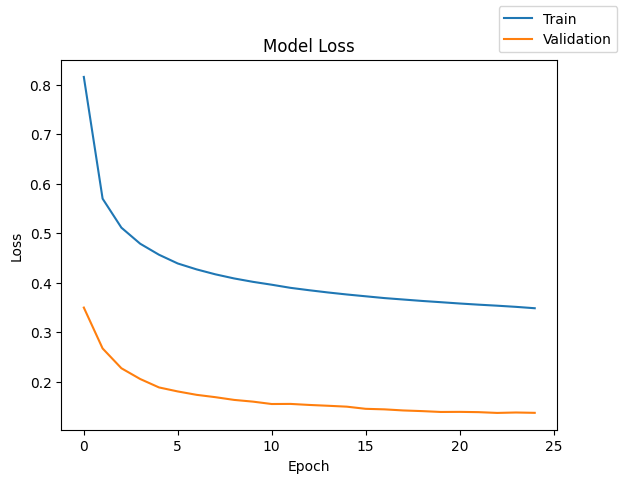

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.96925,0.96925,0.976339,0.971546


In [ ]:
# validation performance
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.96875,0.96875,0.976297,0.971173


Model performance definitely improved from previous models. Model is also generalising well.
- High recall(96.9%) ensures most failures are detected minimizing costly replacements.

- High precision(97.6%) keeps false alarms low controling inspection costs.

- Loss curve shows smooth and consistent convergence for both training and validation, indicating excellent generalization.

## Model 3
Let's add dropout to regularize it.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4635 - val_loss: 0.5292
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0258 - val_loss: 0.4287
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9098 - val_loss: 0.3536
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8486 - val_loss: 0.3058
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7852 - val_loss: 0.2960
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7516 - val_loss: 0.2597
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7136 - val_loss: 0.2563
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6658 - val_loss: 0.2367
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7064 - val_loss: 0.2366
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6545 - val_loss: 0.2323
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6433 - val_loss: 0.2196
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  29.156765699386597


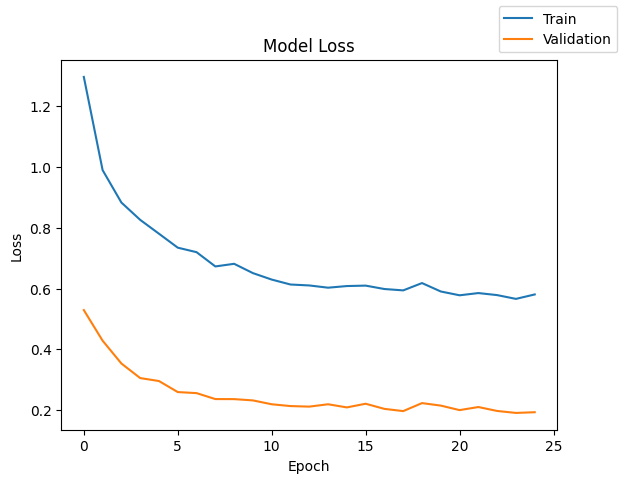

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.972313,0.972313,0.976515,0.973788


In [ ]:
# validation performance
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9765,0.9765,0.97989,0.97765


Performance definitely improved. Model is generalizing well.  

High Recall >97% and Precision over 97.6% meaning most predicted failures are real meaning low inspection waste.

Dropout improved generalization, helping the model perform better on unseen data.

Oscillating Loss Curve
- Validation loss fluctuates across epochs, a common side effect of dropout due to its stochastic nature.

- These oscillations are not harmful as long as the overall trend is downward and final metrics are strong which is the case here.

- Indicates the model is exploring different neuron combinations and avoiding overfitting.

Scope for Improvement
- Add batch normalization to smooth out activations and reduce oscillations.

## Model 4
Let's add batch normalization and see whether this improve the scores.



In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.0510 - val_loss: 0.3817
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.6652 - val_loss: 0.2538
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5477 - val_loss: 0.1993
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4926 - val_loss: 0.1788
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4629 - val_loss: 0.1637
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4426 - val_loss: 0.1508
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4245 - val_loss: 0.1447
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4107 - val_loss: 0.1390
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.3974 - val_loss: 0.1328
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.3832 - val_loss: 0.1288
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3744 - val_loss: 0.1276
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/s

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  47.37301254272461


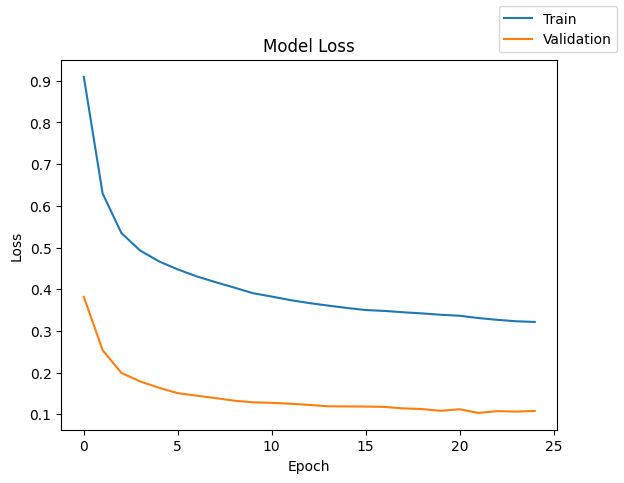

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_4_train_perf = model_performance_classification(model, X_train, y_train)
model_4_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97625,0.97625,0.98022,0.977549


In [ ]:
# validation performance
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.97775,0.97775,0.980954,0.978821


Performance definitely improved.   
High recall(97.6%) with great precision(98%), better precision-recall trade off. Overall great accuracy.   
Model generalizing well.  
Batch normalization stabilized training, leading to smoother and faster convergence.  
Loss curve shows consistent downward trend for both training and validation. No oscillations, unlike Model 3.

## Model 5
Let us add both batchnormalization and dropout to see if regularization can push generalization even further.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 7)              │            28 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771 (3.01 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 42 (168.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.6066 - val_loss: 0.5844
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0929 - val_loss: 0.4690
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9434 - val_loss: 0.3847
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8799 - val_loss: 0.3333
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8074 - val_loss: 0.2961
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7592 - val_loss: 0.2895
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7251 - val_loss: 0.2596
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7361 - val_loss: 0.2536
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6941 - val_loss: 0.2511
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7211 - val_loss: 0.2584
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6975 - val_loss: 0.2339
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  32.04618263244629


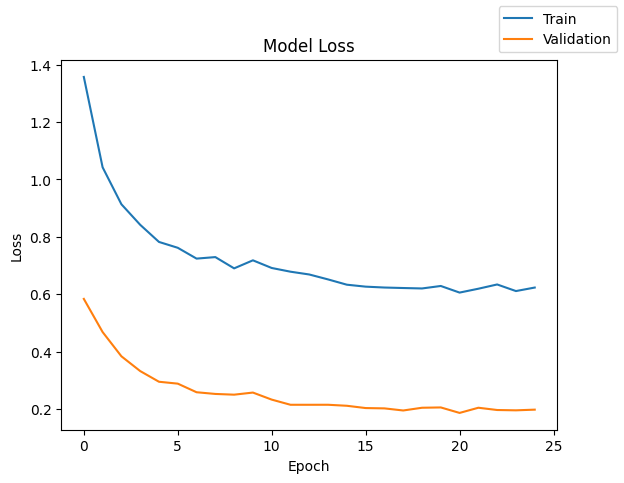

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_5_train_perf = model_performance_classification(model, X_train, y_train)
model_5_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.952125,0.952125,0.968207,0.957481


In [ ]:
# validation performance
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.95725,0.95725,0.971548,0.961845


Model performance degarded. Though the model is generalizing well, previous models performed better.

Mild oscillations are present, likely due to dropout randomness but overall trend is downward and stable.

## Model 6
Let's initialize the weights using He normal.  
We'll also use only Dropout for regularization.

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 14)             │           574 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           105 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687 (2.68 KB)

 Trainable params: 687 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [ ]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.3726 - val_loss: 0.5686
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9881 - val_loss: 0.4242
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8162 - val_loss: 0.3256
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7681 - val_loss: 0.2956
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7322 - val_loss: 0.2891
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6767 - val_loss: 0.2589
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7136 - val_loss: 0.2458
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6578 - val_loss: 0.2434
Epoch 9/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6358 - val_loss: 0.2315
Epoch 10/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6607 - val_loss: 0.2322
Epoch 11/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6214 - val_loss: 0.2236
Epoch 12/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  35.11796522140503


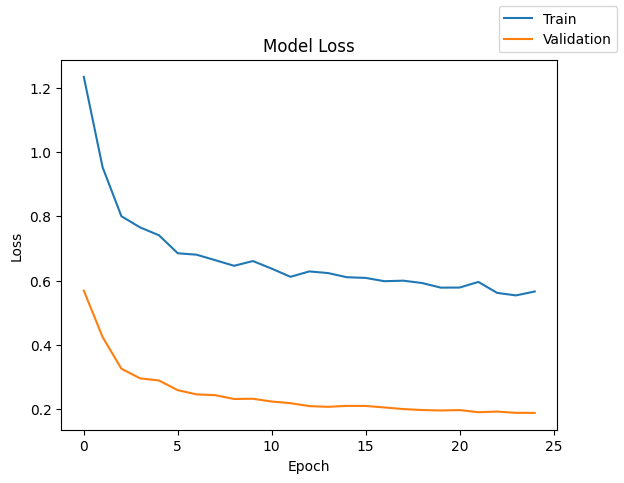

In [ ]:
plot(history,'loss')

In [ ]:
# train performance
model_6_train_perf = model_performance_classification(model, X_train, y_train)
model_6_train_perf

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.977313,0.977313,0.97958,0.978144


In [ ]:
# validation performance
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9805,0.9805,0.982183,0.981114


Excellent model generalization.    
Best overall performance so far across all metrics.  
High recall means fewer missed failures implying lower replacement costs.  
High precision means fewer false alarms implying lower inspection costs.  
Stable training even without batch normalization.

Loss Curve Insights:
- Training loss dropped from ~1.2 to ~0.4
- Validation loss dropped from ~0.6 to ~0.2
- Both curves show smooth, consistent decline with no major oscillations

He initialization helped accelerate convergence by maintaining healthy variance in activations.

Dropout alone provided enough regularization without destabilizing training.




# Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD, No Regularization)",
    "Neural Network (SGD with Momentum, No Regularization)",
    "Neural Network (Adam , No Regularization)",
    "Neural Network (Adam, dropout [0.4,0.2])",
    "Neural Network (Adam, Batch Normalization)",
    "Neural Network (dropout [0.4,0.2], Batch Normalization)",
    "Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
]

In [ ]:
# train performances of all the models
models_train_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.967125,0.958187,0.969250,0.972313,0.976250,0.952125,0.977313
Recall,0.967125,0.958187,0.969250,0.972313,0.976250,0.952125,0.977313
Precision,0.975086,0.972588,0.976339,0.976515,0.980220,0.968207,0.979580
F1 Score,0.969721,0.962737,0.971546,0.973788,0.977549,0.957481,0.978144


In [ ]:
# validation performances of all the models
models_valid_comp_df

,"Neural Network (SGD, No Regularization)","Neural Network (SGD with Momentum, No Regularization)","Neural Network (Adam , No Regularization)","Neural Network (Adam, dropout [0.4,0.2])","Neural Network (Adam, Batch Normalization)","Neural Network (dropout [0.4,0.2], Batch Normalization)","Neural Network (Adam,dropout [0.4,0.2] ,He initialization)"
Accuracy,0.96550,0.953750,0.968750,0.97650,0.977750,0.957250,0.980500
Recall,0.96550,0.953750,0.968750,0.97650,0.977750,0.957250,0.980500
Precision,0.97461,0.970333,0.976297,0.97989,0.980954,0.971548,0.982183
F1 Score,0.96844,0.959095,0.971173,0.97765,0.978821,0.961845,0.981114


In [ ]:
# recall difference comparison across train and validation data
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

,Recall
"Neural Network (SGD, No Regularization)",0.001625
"Neural Network (SGD with Momentum, No Regularization)",0.004437
"Neural Network (Adam , No Regularization)",0.000500
"Neural Network (Adam, dropout [0.4,0.2])",-0.004188
"Neural Network (Adam, Batch Normalization)",-0.001500
"Neural Network (dropout [0.4,0.2], Batch Normalization)",-0.005125
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",-0.003188


In [ ]:
# f1_score difference comparison across train and validation data
models_train_comp_df.loc["F1 Score"] - models_valid_comp_df.loc["F1 Score"]

,F1 Score
"Neural Network (SGD, No Regularization)",0.001281
"Neural Network (SGD with Momentum, No Regularization)",0.003642
"Neural Network (Adam , No Regularization)",0.000373
"Neural Network (Adam, dropout [0.4,0.2])",-0.003862
"Neural Network (Adam, Batch Normalization)",-0.001271
"Neural Network (dropout [0.4,0.2], Batch Normalization)",-0.004364
"Neural Network (Adam,dropout [0.4,0.2] ,He initialization)",-0.002970


When train and validation score differences are compared across recall amd F1 score metrics, it seems Model 3 NN with Adam, no Regularization is performing better.

However, **NN(Adam, dropout, He Initialization)** Model 6 is giving highest validation recall and F1.  
Thereby failures are predicted well in time with less inspection cost wastes giving best cost optimization stategy.

# Best Performing Model
**Neural Network (Adam, dropout [0.4,0.2], He initialization)**(Model 6)

Why It Wins:
- Highest validation Accuracy: 0.98050.
- Highest Recall: 0.98050 meaning best at catching failures.
- Highest Precision: 0.98218 meaning fewest false positives meaning less inspection waste.
- Highest F1 Score: 0.98111 meaning best balance of precision and recall.
- Minimal overfitting: Train vs validation metrics are very close.



As this best performing model(Model 6) was the last one to execute, the **model** that is currently running in our Keras session is our final model.

In [ ]:
# train performance
model_performance_classification(model, X_train, y_train)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.977313,0.977313,0.97958,0.978144


In [ ]:
# test performance
model_performance_classification(model, X_valid, y_valid)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9805,0.9805,0.982183,0.981114


In [ ]:
# model predictons
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# classification report of train data
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     15112
           1       0.75      0.88      0.81       888

    accuracy                           0.98     16000
   macro avg       0.87      0.93      0.90     16000
weighted avg       0.98      0.98      0.98     16000



In [ ]:
# classification report of validation data
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3778
           1       0.78      0.90      0.84       222

    accuracy                           0.98      4000
   macro avg       0.89      0.94      0.91      4000
weighted avg       0.98      0.98      0.98      4000



**Key Insights**

1. High recall for failures (class 1):
   - Validation recall as 0.90 meaning model catches 90% of actual failures.
   - Crucial for minimizing costly replacements.

2. Moderate precision for failures:
   - Validation precision is 0.78 meaning some false alarms, but acceptable given the cost-sensitive context.

3. Macro vs. Weighted Averages:
   - Macro F1 ~ 0.91 meaning strong balance across both classes.
   - Weighted F1 ~ 0.98 reflecting dominance of class 0 but still excellent.

4. Class imbalance handled well:
   - Despite only ~5.5% failures, model maintains high performance on minority class due to class weighting and dropout regularization.

**Strategic Takeaway**  
The model is effective at identifying failures with minimal overfitting.  
Its high recall and solid precision make it ideal for predictive maintenance, where catching failures early is more valuable than avoiding false positives.

# Load the test data

In [ ]:
# loading test data
test_df = pd.read_csv('/content/drive/MyDrive/PGP - AI ML/Neural Networks/Project/Test.csv')

In [ ]:
# Quick glance of test data
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [ ]:
# Separating features and target
X_test = test_df.drop(columns=["Target"])
y_test = test_df["Target"]

## Standardization of test data

In [ ]:
# applying standard scaler from train data and transform
X_test_scaled = scaler.transform(X_test) #(not fit_transform to avoid data leakage)

In [ ]:
# model predictions
y_test_pred = model.predict(X_test_scaled)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# Model Performance on Test Data

In [ ]:
# test performance
model_test_perf = model_performance_classification(model, X_test_scaled, y_test)
model_test_perf

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9764,0.9764,0.977974,0.977028


In [ ]:
# classification report of test data
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4718
           1       0.76      0.85      0.80       282

    accuracy                           0.98      5000
   macro avg       0.88      0.92      0.90      5000
weighted avg       0.98      0.98      0.98      5000



**Key Takeaways**
- High recall for failures (0.85):
  - Model successfully identifies 85% of actual failures → fewer replacements.

- Moderate precision for failures (0.76):
  - Some false alarms thereby manageable inspection costs.

- Macro F1 Score = 0.90:
  - Strong balance across both classes, despite imbalance.

- Weighted F1 Score = 0.98:
  - Reflects excellent overall performance, dominated by class 0.

Consistent performance across train, validation, and test sets:
- Indicates strong generalization and reliability.

**Strategic Implication**  
Model proved effective for predictive maintenance in wind turbines.  
Its ability to catch failures early (high recall) while keeping false alarms reasonable (precision) aligns perfectly with the business goal of minimizing costly replacements.

# **Key Takeaways & Actionable Insights for ReneWind**

**Model Selection**
- **Model 6 (He Initialization + Dropout)** was selected as the best-performing model.
- It consistently achieved ~98% accuracy across train, validation, and test sets.
- **Recall** for failures (class 1) was high (85–90%) ensuring most failing generators are detected early.

**Cost-Sensitive Impact**
- **True Positives (TP)** means generators repaired before failure thereby lower cost.
- **False Negatives (FN)** minimized meaning fewer undetected failures thereby reduced replacement cost.
- **False Positives (FP)** are acceptable in moderation as inspections are cheaper than replacements.

**Business Benefits**
- **Significant reduction in maintenance costs** by shifting from reactive to predictive strategy.
- **Improved operational efficiency** and uptime of wind turbines.
- **Scalable solution:** model can be retrained periodically with new sensor data to adapt to evolving failure patterns.

# Recommendations
- **Deploy the model in production** for real-time failure prediction using turbine sensor data.

- **Set up alert systems** for predicted failures to trigger timely inspections or repairs.

- **Monitor model drift** by evaluating performance regularly and retraining if needed.

- **Integrate with maintenance scheduling systems** to automate repair workflows and optimize resource allocation.